In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../../../input/BES/stratbr_grid_v4/gempy_format/"
geo_model = gp.create_model("StratBR_BES_v4")

No module named 'osgeo'


## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 179000, 0, 148000, -17000, 0],
    resolution=[5, 5, 5],
    path_i=data_path + "surfaces_points_scaled_merged_sf_89_99_full.csv",
    path_o=data_path + "orientations_points_scaled_one_formation.csv",
)

Active grids: ['regular']


StratBR_BES_v4  2024-01-15 23:20

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,sf,Default series,1,#015482,1
1,bes_89,Default series,2,#9f0052,2
2,bes_99,Default series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [4]:
# Ligando a camada a uma série (ponto de orientação somente para uma formação) do topo para base.
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "sf",
            "bes_89",
            "bes_99",
        ),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,sf,Strat_Series,1,#015482,1
1,bes_89,Strat_Series,2,#9f0052,2
2,bes_99,Strat_Series,3,#ffbe00,3
3,basement,Basement_series,1,#728f02,4


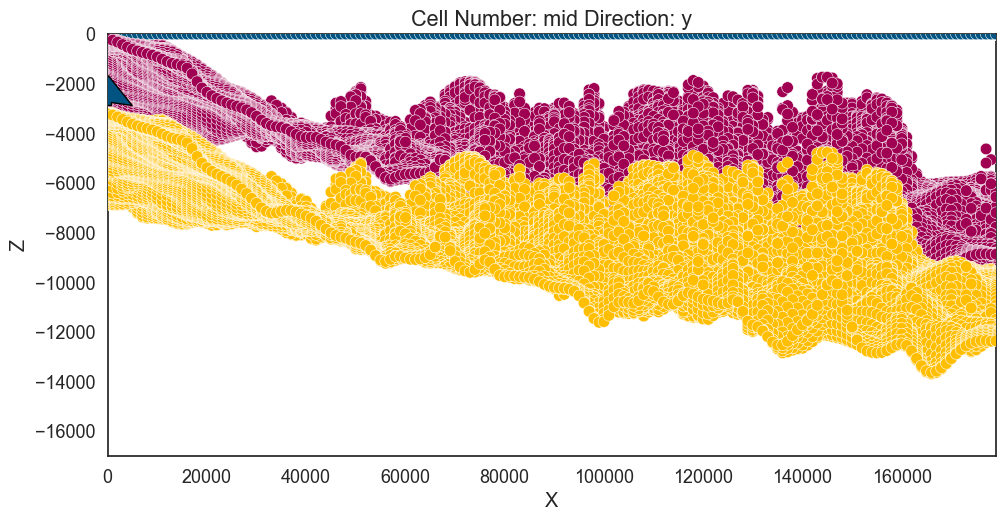

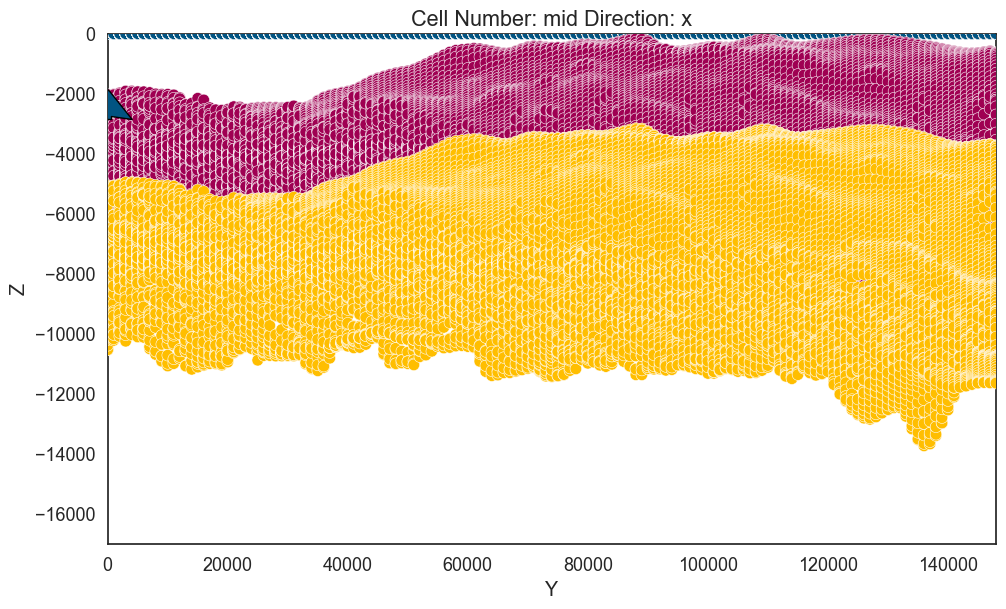

In [5]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=5, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=5, legend=False)
#gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [10]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
)

In [11]:
%%time
gp.set_interpolator(
    geo_model, 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                             values
range                232881.944341
$C_o$            1291285714.285714
drift equations             [3, 3]
CPU times: total: 8.34 s
Wall time: 2min 34s


In [12]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

MemoryError: alloc failed
Apply node that caused the error: Alloc(TensorConstant{0.0}, Elemwise{add,no_inplace}.0, Elemwise{add,no_inplace}.0)
Toposort index: 845
Inputs types: [TensorType(float64, ()), TensorType(int64, ()), TensorType(int64, ())]
Inputs shapes: [(), (), ()]
Inputs strides: [(), (), ()]
Inputs values: [array(0.), array(80463, dtype=int64), array(80463, dtype=int64)]
Inputs type_num: [12, 9, 9]
Outputs clients: [[IncSubtensor{Set;int64:int64:, int64:int64:}(Alloc.0, Covariance Gradient, ScalarConstant{0}, ScalarFromTensor.0, ScalarConstant{0}, ScalarFromTensor.0)]]

Backtrace when the node is created (use Aesara flag traceback__limit=N to make it longer):
  File "c:\Users\bechede\anaconda3\envs\gempy_2.3.1\lib\site-packages\gempy\api_modules\setters.py", line 109, in set_interpolator
    geo_model._interpolator.compile_th_fn_geo(inplace=True, grid=grid)
  File "c:\Users\bechede\anaconda3\envs\gempy_2.3.1\lib\site-packages\gempy\core\interpolator.py", line 1124, in compile_th_fn_geo
    outputs=self.aesara_graph.aesara_output(),
  File "c:\Users\bechede\anaconda3\envs\gempy_2.3.1\lib\site-packages\gempy\core\aesara_modules\aesara_graph_pro.py", line 628, in aesara_output
    solutions[:9] = self.compute_series()
  File "c:\Users\bechede\anaconda3\envs\gempy_2.3.1\lib\site-packages\gempy\core\aesara_modules\aesara_graph_pro.py", line 463, in compute_series
    series, self.updates1 = aesara.scan(
  File "c:\Users\bechede\anaconda3\envs\gempy_2.3.1\lib\site-packages\aesara\scan\basic.py", line 856, in scan
    raw_inner_outputs = fn(*args)
  File "c:\Users\bechede\anaconda3\envs\gempy_2.3.1\lib\site-packages\gempy\core\aesara_modules\aesara_graph_pro.py", line 2133, in compute_a_series
    self.solve_kriging(b),
  File "c:\Users\bechede\anaconda3\envs\gempy_2.3.1\lib\site-packages\gempy\core\aesara_modules\aesara_graph_pro.py", line 1372, in solve_kriging
    C_matrix = self.covariance_matrix()
  File "c:\Users\bechede\anaconda3\envs\gempy_2.3.1\lib\site-packages\gempy\core\aesara_modules\aesara_graph_pro.py", line 1262, in covariance_matrix
    C_matrix = T.zeros((length_of_C, length_of_C))

Debug print of the apply node: 
Alloc [id A] <TensorType(float64, (?, ?))>
 |TensorConstant{0.0} [id B] <TensorType(float64, ())>
 |Elemwise{add,no_inplace} [id C] <TensorType(int64, ())>
 | |Elemwise{switch,no_inplace} [id D] <TensorType(int64, ())>
 | | |Elemwise{eq,no_inplace} [id E] <TensorType(bool, ())>
 | | | |Elemwise{mul,no_inplace} [id F] <TensorType(int64, ())>
 | | | | |TensorConstant{3} [id G] <TensorType(int64, ())>
 | | | | |Elemwise{sub,no_inplace} [id H] <TensorType(int64, ())>
 | | | |   |Elemwise{switch,no_inplace} [id I] <TensorType(int64, ())>
 | | | |   | |Elemwise{lt,no_inplace} [id J] <TensorType(bool, ())>
 | | | |   | | |Elemwise{switch,no_inplace} [id K] <TensorType(int64, ())>
 | | | |   | | | |Elemwise{ge,no_inplace} [id L] <TensorType(bool, ())>
 | | | |   | | | | |Elemwise{switch,no_inplace} [id M] <TensorType(int64, ())>
 | | | |   | | | | | |Elemwise{lt,no_inplace} [id N] <TensorType(bool, ())>
 | | | |   | | | | | | |Elemwise{switch,no_inplace} [id O] <TensorType(int64, ())>
 | | | |   | | | | | | | |Elemwise{lt,no_inplace} [id P] <TensorType(bool, ())>
 | | | |   | | | | | | | | |*3-<TensorType(int32, ())> [id Q] <TensorType(int32, ())>
 | | | |   | | | | | | | | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | | | |   | | | | | | | |TensorFromScalar [id S] <TensorType(int64, ())>
 | | | |   | | | | | | | | |add [id T] <int64>
 | | | |   | | | | | | | |   |ScalarFromTensor [id U] <int32>
 | | | |   | | | | | | | |   | |*3-<TensorType(int32, ())> [id Q] <TensorType(int32, ())>
 | | | |   | | | | | | | |   |ScalarFromTensor [id V] <int64>
 | | | |   | | | | | | | |     |Shape_i{0} [id W] <TensorType(int64, ())>
 | | | |   | | | | | | | |       |*41-<TensorType(float64, (?, ?))> [id X] <TensorType(float64, (?, ?))>
 | | | |   | | | | | | | |*3-<TensorType(int32, ())> [id Q] <TensorType(int32, ())>
 | | | |   | | | | | | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | | | |   | | | | | |TensorConstant{-1} [id Y] <TensorType(int8, ())>
 | | | |   | | | | | |Elemwise{switch,no_inplace} [id O] <TensorType(int64, ())>
 | | | |   | | | | |Shape_i{0} [id W] <TensorType(int64, ())>
 | | | |   | | | |Shape_i{0} [id W] <TensorType(int64, ())>
 | | | |   | | | |Elemwise{switch,no_inplace} [id M] <TensorType(int64, ())>
 | | | |   | | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | | | |   | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | | | |   | |Elemwise{switch,no_inplace} [id K] <TensorType(int64, ())>
 | | | |   |Elemwise{switch,no_inplace} [id Z] <TensorType(int64, ())>
 | | | |     |Elemwise{lt,no_inplace} [id BA] <TensorType(bool, ())>
 | | | |     | |Elemwise{switch,no_inplace} [id BB] <TensorType(int64, ())>
 | | | |     | | |Elemwise{lt,no_inplace} [id BC] <TensorType(bool, ())>
 | | | |     | | | |Elemwise{switch,no_inplace} [id BD] <TensorType(int64, ())>
 | | | |     | | | | |Elemwise{ge,no_inplace} [id BE] <TensorType(bool, ())>
 | | | |     | | | | | |Elemwise{switch,no_inplace} [id BF] <TensorType(int64, ())>
 | | | |     | | | | | | |Elemwise{lt,no_inplace} [id BG] <TensorType(bool, ())>
 | | | |     | | | | | | | |Elemwise{switch,no_inplace} [id BH] <TensorType(int64, ())>
 | | | |     | | | | | | | | |Elemwise{lt,no_inplace} [id BI] <TensorType(bool, ())>
 | | | |     | | | | | | | | | |*2-<TensorType(int32, ())> [id BJ] <TensorType(int32, ())>
 | | | |     | | | | | | | | | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | | | |     | | | | | | | | |TensorFromScalar [id BK] <TensorType(int64, ())>
 | | | |     | | | | | | | | | |add [id BL] <int64>
 | | | |     | | | | | | | | |   |ScalarFromTensor [id BM] <int32>
 | | | |     | | | | | | | | |   | |*2-<TensorType(int32, ())> [id BJ] <TensorType(int32, ())>
 | | | |     | | | | | | | | |   |ScalarFromTensor [id V] <int64>
 | | | |     | | | | | | | | |*2-<TensorType(int32, ())> [id BJ] <TensorType(int32, ())>
 | | | |     | | | | | | | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | | | |     | | | | | | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | | | |     | | | | | | |Elemwise{switch,no_inplace} [id BH] <TensorType(int64, ())>
 | | | |     | | | | | |Shape_i{0} [id W] <TensorType(int64, ())>
 | | | |     | | | | |Shape_i{0} [id W] <TensorType(int64, ())>
 | | | |     | | | | |Elemwise{switch,no_inplace} [id BF] <TensorType(int64, ())>
 | | | |     | | | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | | | |     | | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | | | |     | | |Elemwise{switch,no_inplace} [id BD] <TensorType(int64, ())>
 | | | |     | |Elemwise{switch,no_inplace} [id I] <TensorType(int64, ())>
 | | | |     |Elemwise{switch,no_inplace} [id BB] <TensorType(int64, ())>
 | | | |     |Elemwise{switch,no_inplace} [id I] <TensorType(int64, ())>
 | | | |TensorConstant{-1} [id Y] <TensorType(int8, ())>
 | | |Elemwise{floor_divide,no_inplace} [id BN] <TensorType(int64, ())>
 | | | |Elemwise{mul,no_inplace} [id BO] <TensorType(int64, ())>
 | | | | |TensorConstant{3} [id G] <TensorType(int64, ())>
 | | | | |Elemwise{sub,no_inplace} [id H] <TensorType(int64, ())>
 | | | | |Shape_i{1} [id BP] <TensorType(int64, ())>
 | | | |   |*41-<TensorType(float64, (?, ?))> [id X] <TensorType(float64, (?, ?))>
 | | | |Elemwise{scalar_maximum,no_inplace} [id BQ] <TensorType(int64, ())>
 | | |   |Elemwise{mul,no_inplace} [id BR] <TensorType(int64, ())>
 | | |   | |TensorConstant{-3} [id BS] <TensorType(int64, ())>
 | | |   | |Elemwise{sub,no_inplace} [id H] <TensorType(int64, ())>
 | | |   | |Shape_i{1} [id BP] <TensorType(int64, ())>
 | | |   |TensorConstant{1} [id BT] <TensorType(int64, ())>
 | | |Elemwise{mul,no_inplace} [id F] <TensorType(int64, ())>
 | |Elemwise{sub,no_inplace} [id BU] <TensorType(int64, ())>
 | | |Elemwise{switch,no_inplace} [id BV] <TensorType(int64, ())>
 | | | |Elemwise{lt,no_inplace} [id BW] <TensorType(bool, ())>
 | | | | |Elemwise{switch,no_inplace} [id BX] <TensorType(int64, ())>
 | | | | | |Elemwise{ge,no_inplace} [id BY] <TensorType(bool, ())>
 | | | | | | |Elemwise{switch,no_inplace} [id BZ] <TensorType(int64, ())>
 | | | | | | | |Elemwise{lt,no_inplace} [id CA] <TensorType(bool, ())>
 | | | | | | | | |Elemwise{switch,no_inplace} [id CB] <TensorType(int64, ())>
 | | | | | | | | | |Elemwise{lt,no_inplace} [id CC] <TensorType(bool, ())>
 | | | | | | | | | | |*1-<TensorType(int32, ())> [id CD] <TensorType(int32, ())>
 | | | | | | | | | | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | | | | | | | | | |TensorFromScalar [id CE] <TensorType(int64, ())>
 | | | | | | | | | | |add [id CF] <int64>
 | | | | | | | | | |   |ScalarFromTensor [id CG] <int32>
 | | | | | | | | | |   | |*1-<TensorType(int32, ())> [id CD] <TensorType(int32, ())>
 | | | | | | | | | |   |ScalarFromTensor [id CH] <int64>
 | | | | | | | | | |     |Shape_i{0} [id CI] <TensorType(int64, ())>
 | | | | | | | | | |       |Nonzero [id CJ] <TensorType(int64, (?,))>
 | | | | | | | | | |         |AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id CK] <TensorType(int16, (?,))>
 | | | | | | | | | |           |Alloc [id CL] <TensorType(int16, (?,))>
 | | | | | | | | | |           | |TensorConstant{1} [id CM] <TensorType(int16, ())>
 | | | | | | | | | |           | |Shape_i{0} [id CN] <TensorType(int64, ())>
 | | | | | | | | | |           |   |*40-<TensorType(float64, (?, ?))> [id CO] <TensorType(float64, (?, ?))>
 | | | | | | | | | |           |TensorConstant{0} [id R] <TensorType(int8, ())>
 | | | | | | | | | |           |CumOp{None, add} [id CP] <TensorType(int32, (?,))>
 | | | | | | | | | |             |Join [id CQ] <TensorType(int32, (?,))>
 | | | | | | | | | |               |TensorConstant{0} [id R] <TensorType(int8, ())>
 | | | | | | | | | |               |TensorConstant{(1,) of 0} [id CR] <TensorType(int8, (1,))>
 | | | | | | | | | |               |Elemwise{add,no_inplace} [id CS] <TensorType(int32, (?,))>
 | | | | | | | | | |                 |TensorConstant{(1,) of 1} [id CT] <TensorType(int32, (1,))>
 | | | | | | | | | |                 |Subtensor{:int64:} [id CU] <TensorType(int32, (?,))>
 | | | | | | | | | |                   |*26-<TensorType(int32, (?,))> [id CV] <TensorType(int32, (?,))>
 | | | | | | | | | |                   |ScalarConstant{-1} [id CW] <int64>
 | | | | | | | | | |*1-<TensorType(int32, ())> [id CD] <TensorType(int32, ())>
 | | | | | | | | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | | | | | | | |TensorConstant{-1} [id Y] <TensorType(int8, ())>
 | | | | | | | |Elemwise{switch,no_inplace} [id CB] <TensorType(int64, ())>
 | | | | | | |Shape_i{0} [id CI] <TensorType(int64, ())>
 | | | | | |Shape_i{0} [id CI] <TensorType(int64, ())>
 | | | | | |Elemwise{switch,no_inplace} [id BZ] <TensorType(int64, ())>
 | | | | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | | | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | | | |Elemwise{switch,no_inplace} [id BX] <TensorType(int64, ())>
 | | |Elemwise{switch,no_inplace} [id CX] <TensorType(int64, ())>
 | |   |Elemwise{lt,no_inplace} [id CY] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id CZ] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id DA] <TensorType(bool, ())>
 | |   | | | |Elemwise{switch,no_inplace} [id DB] <TensorType(int64, ())>
 | |   | | | | |Elemwise{ge,no_inplace} [id DC] <TensorType(bool, ())>
 | |   | | | | | |Elemwise{switch,no_inplace} [id DD] <TensorType(int64, ())>
 | |   | | | | | | |Elemwise{lt,no_inplace} [id DE] <TensorType(bool, ())>
 | |   | | | | | | | |Elemwise{switch,no_inplace} [id DF] <TensorType(int64, ())>
 | |   | | | | | | | | |Elemwise{lt,no_inplace} [id DG] <TensorType(bool, ())>
 | |   | | | | | | | | | |*0-<TensorType(int32, ())> [id DH] <TensorType(int32, ())>
 | |   | | | | | | | | | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | |   | | | | | | | | |TensorFromScalar [id DI] <TensorType(int64, ())>
 | |   | | | | | | | | | |add [id DJ] <int64>
 | |   | | | | | | | | |   |ScalarFromTensor [id DK] <int32>
 | |   | | | | | | | | |   | |*0-<TensorType(int32, ())> [id DH] <TensorType(int32, ())>
 | |   | | | | | | | | |   |ScalarFromTensor [id CH] <int64>
 | |   | | | | | | | | |*0-<TensorType(int32, ())> [id DH] <TensorType(int32, ())>
 | |   | | | | | | | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | |   | | | | | | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | |   | | | | | | |Elemwise{switch,no_inplace} [id DF] <TensorType(int64, ())>
 | |   | | | | | |Shape_i{0} [id CI] <TensorType(int64, ())>
 | |   | | | | |Shape_i{0} [id CI] <TensorType(int64, ())>
 | |   | | | | |Elemwise{switch,no_inplace} [id DD] <TensorType(int64, ())>
 | |   | | | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | |   | | |TensorConstant{0} [id R] <TensorType(int8, ())>
 | |   | | |Elemwise{switch,no_inplace} [id DB] <TensorType(int64, ())>
 | |   | |Elemwise{switch,no_inplace} [id BV] <TensorType(int64, ())>
 | |   |Elemwise{switch,no_inplace} [id CZ] <TensorType(int64, ())>
 | |   |Elemwise{switch,no_inplace} [id BV] <TensorType(int64, ())>
 | |*8-<TensorType(int32, ())> [id DL] <TensorType(int32, ())>
 | |Elemwise{Cast{int32}} [id DM] <TensorType(int32, ())>
 |   |Shape_i{0} [id DN] <TensorType(int64, ())>
 |     |Nonzero [id DO] <TensorType(int64, (?,))>
 |       |Elemwise{Cast{int8}} [id DP] <TensorType(int8, (?,))>
 |         |Subtensor{::, int8} [id DQ] <TensorType(int32, (?,))>
 |           |*27-<TensorType(int32, (?, ?))> [id DR] <TensorType(int32, (?, ?))>
 |           |ScalarFromTensor [id DS] <int8>
 |             |Elemwise{Cast{int8}} [id DT] <TensorType(int8, ())>
 |               |*15-<TensorType(int32, ())> [id DU] <TensorType(int32, ())>
 |Elemwise{add,no_inplace} [id C] <TensorType(int64, ())>

HINT: Use the Aesara flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.
Apply node that caused the error: for{cpu,Looping}(Elemwise{scalar_minimum,no_inplace}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, Number of points per surface used to split rest-ref, fault relation matrix, <TensorType(float64, ())>, <TensorType(float64, ())>, <TensorType(float64, ())>, Nugget effect of gradients, Nugget effect of scalar, Attenuation factor, Sigmoid Outside, Sigmoid slope, <TensorType(int32, (?,))>, <TensorType(bool, (?,))>, <TensorType(int32, (?,))>, Coordinates of the grid points to interpolate, All the surface_points points at once, Position of the dips, Angle of every dip, Azimuth, Polarity, Values that the blocks are taking)
Toposort index: 390
Inputs types: [TensorType(int64, ()), TensorType(int32, (?,)), TensorType(int32, (?,)), TensorType(int32, (?,)), TensorType(int32, (?,)), TensorType(int32, (?,)), TensorType(int32, (?,)), TensorType(int32, (?,)), TensorType(int32, (?,)), TensorType(int32, (?,)), TensorType(bool, (?,)), TensorType(bool, (?,)), TensorType(bool, (?,)), TensorType(int32, (?,)), TensorType(int32, (?,)), TensorType(int32, (?,)), TensorType(int32, (?,)), TensorType(float64, (?,)), TensorType(float64, (?,)), TensorType(float64, (?, ?, ?, ?)), TensorType(float64, (?, ?)), TensorType(float64, (?, ?, ?)), TensorType(float64, (?, ?, ?)), TensorType(bool, (?, ?, ?)), TensorType(bool, (?, ?, ?)), TensorType(float64, (?, ?, ?, ?)), TensorType(int64, (?,)), TensorType(int32, (?,)), TensorType(int32, (?, ?)), TensorType(float64, ()), TensorType(float64, ()), TensorType(float64, ()), TensorType(float64, (?,)), TensorType(float64, (?,)), TensorType(float64, ()), TensorType(float64, ()), TensorType(float64, ()), TensorType(int32, (?,)), TensorType(bool, (?,)), TensorType(int32, (?,)), TensorType(float64, (?, ?)), TensorType(float64, (?, ?)), TensorType(float64, (?, ?)), TensorType(float64, (?,)), TensorType(float64, (?,)), TensorType(float64, (?,)), TensorType(float64, (?, ?))]
Inputs shapes: [(), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (2, 1, 1, 161039), (2, 80463), (2, 1, 161039), (2, 1, 3), (2, 1, 161039), (2, 1, 161039), (2, 1, 1, 161039), (2,), (3,), (1, 1), (), (), (), (3,), (80460,), (), (), (), (1,), (1,), (1,), (125, 3), (80460, 3), (1, 3), (1,), (1,), (1,), (1, 4)]
Inputs strides: [(), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (1,), (1,), (1,), (4,), (4,), (4,), (4,), (8,), (8,), (1288312, 1288312, 1288312, 8), (643704, 8), (1288312, 1288312, 8), (24, 24, 8), (161039, 161039, 1), (161039, 161039, 1), (1288312, 1288312, 1288312, 8), (8,), (4,), (4, 4), (), (), (), (8,), (8,), (), (), (), (4,), (1,), (4,), (24, 8), (8, 643680), (24, 8), (8,), (8,), (8,), (32, 8)]
Inputs values: [array(1, dtype=int64), array([0]), array([80457]), array([0]), array([1]), array([0]), array([80463]), array([0]), array([3]), array([3]), array([ True]), array([ True]), array([ True]), array([0]), array([0]), array([0]), array([0]), array([0.65050822]), array([3606.94333599]), 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', array([0, 4], dtype=int64), array([26819, 26819, 26819]), array([[0]]), array(10.), array(2.), array(4.), array([0.01, 0.01, 0.01]), 'not shown', array(2.), array(50.), array(50000.), array([0]), array([False]), array([0]), 'not shown', 'not shown', array([[0.2501    , 0.29339609, 0.51133743]]), array([0.]), array([0.]), array([1.]), array([[1., 2., 3., 4.]])]
Inputs type_num: [9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 7, 7, 7, 7, 12, 12, 12, 12, 12, 12, 0, 0, 12, 9, 7, 7, 12, 12, 12, 12, 12, 12, 12, 12, 7, 0, 7, 12, 12, 12, 12, 12, 12, 12]
Outputs clients: [[Subtensor{int64}(for{cpu,Looping}.0, ScalarFromTensor.0)], [Subtensor{int64}(for{cpu,Looping}.1, ScalarFromTensor.0)], [Subtensor{int64}(for{cpu,Looping}.2, ScalarFromTensor.0)], [Subtensor{int64}(for{cpu,Looping}.3, ScalarFromTensor.0)], [Subtensor{int64, :int64:}(for{cpu,Looping}.4, ScalarFromTensor.0, ScalarConstant{-1}), Subtensor{int64}(for{cpu,Looping}.4, ScalarFromTensor.0)], [Subtensor{int64}(for{cpu,Looping}.5, ScalarFromTensor.0)], [], []]

Backtrace when the node is created (use Aesara flag traceback__limit=N to make it longer):
  File "C:\Users\bechede\AppData\Local\Temp\ipykernel_11636\722893756.py", line 1, in <module>
    get_ipython().run_cell_magic('time', '', 'gp.set_interpolator(\n    geo_model, \n    compile_theano=True, \n    theano_optimizer=\'fast_run\', # fast_compile, fast_run\n    dtype="float64",  # for model stability\n)\n')
  File "c:\Users\bechede\anaconda3\envs\gempy_2.3.1\lib\site-packages\IPython\core\interactiveshell.py", line 2517, in run_cell_magic
    result = fn(*args, **kwargs)
  File "c:\Users\bechede\anaconda3\envs\gempy_2.3.1\lib\site-packages\IPython\core\magics\execution.py", line 1332, in time
    out = eval(code, glob, local_ns)
  File "<timed eval>", line 1, in <module>
  File "c:\Users\bechede\anaconda3\envs\gempy_2.3.1\lib\site-packages\gempy\api_modules\setters.py", line 109, in set_interpolator
    geo_model._interpolator.compile_th_fn_geo(inplace=True, grid=grid)
  File "c:\Users\bechede\anaconda3\envs\gempy_2.3.1\lib\site-packages\gempy\core\interpolator.py", line 1124, in compile_th_fn_geo
    outputs=self.aesara_graph.aesara_output(),
  File "c:\Users\bechede\anaconda3\envs\gempy_2.3.1\lib\site-packages\gempy\core\aesara_modules\aesara_graph_pro.py", line 628, in aesara_output
    solutions[:9] = self.compute_series()
  File "c:\Users\bechede\anaconda3\envs\gempy_2.3.1\lib\site-packages\gempy\core\aesara_modules\aesara_graph_pro.py", line 463, in compute_series
    series, self.updates1 = aesara.scan(

Debug print of the apply node: 
for{cpu,Looping}.0 [id A] <TensorType(float64, (?, ?, ?, ?))>
 |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |Elemwise{scalar_minimum,no_inplace} [id C] <TensorType(int64, ())>
 | | |Elemwise{scalar_minimum,no_inplace} [id D] <TensorType(int64, ())>
 | | | |Elemwise{scalar_minimum,no_inplace} [id E] <TensorType(int64, ())>
 | | | | |Elemwise{scalar_minimum,no_inplace} [id F] <TensorType(int64, ())>
 | | | | | |Elemwise{scalar_minimum,no_inplace} [id G] <TensorType(int64, ())>
 | | | | | | |Elemwise{scalar_minimum,no_inplace} [id H] <TensorType(int64, ())>
 | | | | | | | |Elemwise{scalar_minimum,no_inplace} [id I] <TensorType(int64, ())>
 | | | | | | | | |Elemwise{scalar_minimum,no_inplace} [id J] <TensorType(int64, ())>
 | | | | | | | | | |Elemwise{scalar_minimum,no_inplace} [id K] <TensorType(int64, ())>
 | | | | | | | | | | |Elemwise{scalar_minimum,no_inplace} [id L] <TensorType(int64, ())>
 | | | | | | | | | | | |Elemwise{scalar_minimum,no_inplace} [id M] <TensorType(int64, ())>
 | | | | | | | | | | | | |Elemwise{scalar_minimum,no_inplace} [id N] <TensorType(int64, ())>
 | | | | | | | | | | | | | |Elemwise{scalar_minimum,no_inplace} [id O] <TensorType(int64, ())>
 | | | | | | | | | | | | | | |Elemwise{scalar_minimum,no_inplace} [id P] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | |Elemwise{scalar_minimum,no_inplace} [id Q] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | | |Elemwise{scalar_minimum,no_inplace} [id R] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | | | |Elemwise{switch,no_inplace} [id S] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | | | | |Elemwise{lt,no_inplace} [id T] <TensorType(bool, ())>
 | | | | | | | | | | | | | | | | | | | |Elemwise{add,no_inplace} [id U] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | | | | | | |TensorConstant{-1} [id V] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | | | | | | |Shape_i{0} [id W] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | | | | | |   |Length of surface_points in every series [id X] <TensorType(int32, (?,))>
 | | | | | | | | | | | | | | | | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | | | | | | | | | | | | | | | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | | | | | | | | | | | | | | | | | | |Elemwise{add,no_inplace} [id U] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | | | |Elemwise{sub,no_inplace} [id Z] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | | |   |Shape_i{0} [id W] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | | |   |Elemwise{switch,no_inplace} [id BA] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | | |     |Elemwise{lt,no_inplace} [id BB] <TensorType(bool, ())>
 | | | | | | | | | | | | | | | | |     | |TensorConstant{1} [id BC] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | | |     | |Shape_i{0} [id W] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | | |     |TensorConstant{1} [id BC] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | | |     |Shape_i{0} [id W] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | | |Elemwise{switch,no_inplace} [id BD] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | |   |Elemwise{lt,no_inplace} [id BE] <TensorType(bool, ())>
 | | | | | | | | | | | | | | | |   | |Elemwise{add,no_inplace} [id BF] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | |   | | |TensorConstant{-1} [id V] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | |   | | |Shape_i{0} [id BG] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | |   | |   |Length of foliations in every series [id BH] <TensorType(int32, (?,))>
 | | | | | | | | | | | | | | | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | | | | | | | | | | | | | | | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | | | | | | | | | | | | | | | |   |Elemwise{add,no_inplace} [id BF] <TensorType(int64, ())>
 | | | | | | | | | | | | | | | |Elemwise{sub,no_inplace} [id BI] <TensorType(int64, ())>
 | | | | | | | | | | | | | | |   |Shape_i{0} [id BG] <TensorType(int64, ())>
 | | | | | | | | | | | | | | |   |Elemwise{switch,no_inplace} [id BJ] <TensorType(int64, ())>
 | | | | | | | | | | | | | | |     |Elemwise{lt,no_inplace} [id BK] <TensorType(bool, ())>
 | | | | | | | | | | | | | | |     | |TensorConstant{1} [id BC] <TensorType(int64, ())>
 | | | | | | | | | | | | | | |     | |Shape_i{0} [id BG] <TensorType(int64, ())>
 | | | | | | | | | | | | | | |     |TensorConstant{1} [id BC] <TensorType(int64, ())>
 | | | | | | | | | | | | | | |     |Shape_i{0} [id BG] <TensorType(int64, ())>
 | | | | | | | | | | | | | | |Elemwise{switch,no_inplace} [id BL] <TensorType(int64, ())>
 | | | | | | | | | | | | | |   |Elemwise{lt,no_inplace} [id BM] <TensorType(bool, ())>
 | | | | | | | | | | | | | |   | |Elemwise{add,no_inplace} [id BN] <TensorType(int64, ())>
 | | | | | | | | | | | | | |   | | |TensorConstant{-1} [id V] <TensorType(int64, ())>
 | | | | | | | | | | | | | |   | | |Shape_i{0} [id BO] <TensorType(int64, ())>
 | | | | | | | | | | | | | |   | |   |Length of weights in every series [id BP] <TensorType(int32, (?,))>
 | | | | | | | | | | | | | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | | | | | | | | | | | | | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | | | | | | | | | | | | | |   |Elemwise{add,no_inplace} [id BN] <TensorType(int64, ())>
 | | | | | | | | | | | | | |Elemwise{sub,no_inplace} [id BQ] <TensorType(int64, ())>
 | | | | | | | | | | | | |   |Shape_i{0} [id BO] <TensorType(int64, ())>
 | | | | | | | | | | | | |   |Elemwise{switch,no_inplace} [id BR] <TensorType(int64, ())>
 | | | | | | | | | | | | |     |Elemwise{lt,no_inplace} [id BS] <TensorType(bool, ())>
 | | | | | | | | | | | | |     | |TensorConstant{1} [id BC] <TensorType(int64, ())>
 | | | | | | | | | | | | |     | |Shape_i{0} [id BO] <TensorType(int64, ())>
 | | | | | | | | | | | | |     |TensorConstant{1} [id BC] <TensorType(int64, ())>
 | | | | | | | | | | | | |     |Shape_i{0} [id BO] <TensorType(int64, ())>
 | | | | | | | | | | | | |Elemwise{switch,no_inplace} [id BT] <TensorType(int64, ())>
 | | | | | | | | | | | |   |Elemwise{lt,no_inplace} [id BU] <TensorType(bool, ())>
 | | | | | | | | | | | |   | |Elemwise{add,no_inplace} [id BV] <TensorType(int64, ())>
 | | | | | | | | | | | |   | | |TensorConstant{-1} [id V] <TensorType(int64, ())>
 | | | | | | | | | | | |   | | |Shape_i{0} [id BW] <TensorType(int64, ())>
 | | | | | | | | | | | |   | |   |List with the number of surfaces [id BX] <TensorType(int32, (?,))>
 | | | | | | | | | | | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | | | | | | | | | | | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | | | | | | | | | | | |   |Elemwise{add,no_inplace} [id BV] <TensorType(int64, ())>
 | | | | | | | | | | | |Elemwise{sub,no_inplace} [id BY] <TensorType(int64, ())>
 | | | | | | | | | | |   |Shape_i{0} [id BW] <TensorType(int64, ())>
 | | | | | | | | | | |   |Elemwise{switch,no_inplace} [id BZ] <TensorType(int64, ())>
 | | | | | | | | | | |     |Elemwise{lt,no_inplace} [id CA] <TensorType(bool, ())>
 | | | | | | | | | | |     | |TensorConstant{1} [id BC] <TensorType(int64, ())>
 | | | | | | | | | | |     | |Shape_i{0} [id BW] <TensorType(int64, ())>
 | | | | | | | | | | |     |TensorConstant{1} [id BC] <TensorType(int64, ())>
 | | | | | | | | | | |     |Shape_i{0} [id BW] <TensorType(int64, ())>
 | | | | | | | | | | |Shape_i{0} [id CB] <TensorType(int64, ())>
 | | | | | | | | | |   |Grade of the universal drift [id CC] <TensorType(int32, (?,))>
 | | | | | | | | | |Shape_i{0} [id CD] <TensorType(int64, ())>
 | | | | | | | | |   |Vector controlling if weights must be recomputed [id CE] <TensorType(bool, (?,))>
 | | | | | | | | |Shape_i{0} [id CF] <TensorType(int64, ())>
 | | | | | | | |   |Vector controlling if scalar matrix must be recomputed [id CG] <TensorType(bool, (?,))>
 | | | | | | | |Shape_i{0} [id CH] <TensorType(int64, ())>
 | | | | | | |   |Vector controlling if block matrix must be recomputed [id CI] <TensorType(bool, (?,))>
 | | | | | | |Shape_i{0} [id CJ] <TensorType(int64, ())>
 | | | | | |   |The series (fault) is finite [id CK] <TensorType(int32, (?,))>
 | | | | | |Shape_i{0} [id CL] <TensorType(int64, ())>
 | | | | |   |<TensorType(int32, (?,))> [id CM] <TensorType(int32, (?,))>
 | | | | |Shape_i{0} [id CN] <TensorType(int64, ())>
 | | | |   |<TensorType(int32, (?,))> [id CO] <TensorType(int32, (?,))>
 | | | |TensorConstant{5000} [id CP] <TensorType(int64, ())>
 | | |Shape_i{0} [id CQ] <TensorType(int64, ())>
 | |   |Range [id CR] <TensorType(float64, (?,))>
 | |Shape_i{0} [id CS] <TensorType(int64, ())>
 |   |Covariance at 0 [id CT] <TensorType(float64, (?,))>
 |Subtensor{int64:int64:int8} [id CU] <TensorType(int32, (?,))>
 | |Length of surface_points in every series [id X] <TensorType(int32, (?,))>
 | |ScalarFromTensor [id CV] <int64>
 | | |Elemwise{switch,no_inplace} [id CW] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id CX] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id CY] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | |Elemwise{switch,no_inplace} [id DA] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id DB] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id DC] <TensorType(int64, ())>
 | |   | | | | | |add [id DD] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | | | | |   |ScalarFromTensor [id DF] <int64>
 | |   | | | | |     |Elemwise{switch,no_inplace} [id S] <TensorType(int64, ())>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id DC] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id DG] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id DH] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |Elemwise{switch,no_inplace} [id S] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |Elemwise{switch,no_inplace} [id S] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id DI] <TensorType(int64, ())>
 | |     |TensorConstant{0} [id DJ] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id S] <TensorType(int64, ())>
 | |ScalarFromTensor [id DK] <int64>
 | | |Elemwise{switch,no_inplace} [id DL] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id CX] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id DM] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id CY] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id S] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |Subtensor{int64:int64:int8} [id DO] <TensorType(int32, (?,))>
 | |Length of surface_points in every series [id X] <TensorType(int32, (?,))>
 | |ScalarFromTensor [id DP] <int64>
 | | |Elemwise{switch,no_inplace} [id DQ] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id DR] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id DS] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | |Elemwise{switch,no_inplace} [id DT] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id DU] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id DV] <TensorType(int64, ())>
 | |   | | | | | |add [id DW] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   |ScalarFromTensor [id DX] <int64>
 | |   | | | | |     |Elemwise{sub,no_inplace} [id Z] <TensorType(int64, ())>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id DV] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id DY] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id DZ] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |Elemwise{sub,no_inplace} [id Z] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |Elemwise{sub,no_inplace} [id Z] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id EA] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id BA] <TensorType(int64, ())>
 | |     |Shape_i{0} [id W] <TensorType(int64, ())>
 | |ScalarFromTensor [id EB] <int64>
 | | |Elemwise{switch,no_inplace} [id EC] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id DR] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id ED] <TensorType(int64, ())>
 | |     |Elemwise{add,no_inplace} [id EE] <TensorType(int64, ())>
 | |     | |Elemwise{switch,no_inplace} [id BA] <TensorType(int64, ())>
 | |     | |Elemwise{switch,no_inplace} [id DS] <TensorType(int64, ())>
 | |     |Shape_i{0} [id W] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |Subtensor{int64:int64:int8} [id EF] <TensorType(int32, (?,))>
 | |Length of foliations in every series [id BH] <TensorType(int32, (?,))>
 | |ScalarFromTensor [id EG] <int64>
 | | |Elemwise{switch,no_inplace} [id EH] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id EI] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id EJ] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | |Elemwise{switch,no_inplace} [id EK] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id EL] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id EM] <TensorType(int64, ())>
 | |   | | | | | |add [id EN] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   |ScalarFromTensor [id EO] <int64>
 | |   | | | | |     |Elemwise{switch,no_inplace} [id BD] <TensorType(int64, ())>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id EM] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id EP] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id EQ] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |Elemwise{switch,no_inplace} [id BD] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |Elemwise{switch,no_inplace} [id BD] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id ER] <TensorType(int64, ())>
 | |     |TensorConstant{0} [id DJ] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id BD] <TensorType(int64, ())>
 | |ScalarFromTensor [id ES] <int64>
 | | |Elemwise{switch,no_inplace} [id ET] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id EI] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id EU] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id EJ] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id BD] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |Subtensor{int64:int64:int8} [id EV] <TensorType(int32, (?,))>
 | |Length of foliations in every series [id BH] <TensorType(int32, (?,))>
 | |ScalarFromTensor [id EW] <int64>
 | | |Elemwise{switch,no_inplace} [id EX] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id EY] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id EZ] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | |Elemwise{switch,no_inplace} [id FA] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id FB] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id FC] <TensorType(int64, ())>
 | |   | | | | | |add [id FD] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   |ScalarFromTensor [id FE] <int64>
 | |   | | | | |     |Elemwise{sub,no_inplace} [id BI] <TensorType(int64, ())>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id FC] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id FF] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id FG] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |Elemwise{sub,no_inplace} [id BI] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |Elemwise{sub,no_inplace} [id BI] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id FH] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id BJ] <TensorType(int64, ())>
 | |     |Shape_i{0} [id BG] <TensorType(int64, ())>
 | |ScalarFromTensor [id FI] <int64>
 | | |Elemwise{switch,no_inplace} [id FJ] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id EY] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id FK] <TensorType(int64, ())>
 | |     |Elemwise{add,no_inplace} [id FL] <TensorType(int64, ())>
 | |     | |Elemwise{switch,no_inplace} [id BJ] <TensorType(int64, ())>
 | |     | |Elemwise{switch,no_inplace} [id EZ] <TensorType(int64, ())>
 | |     |Shape_i{0} [id BG] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |Subtensor{int64:int64:int8} [id FM] <TensorType(int32, (?,))>
 | |Length of weights in every series [id BP] <TensorType(int32, (?,))>
 | |ScalarFromTensor [id FN] <int64>
 | | |Elemwise{switch,no_inplace} [id FO] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id FP] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id FQ] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | |Elemwise{switch,no_inplace} [id FR] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id FS] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id FT] <TensorType(int64, ())>
 | |   | | | | | |add [id FU] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   |ScalarFromTensor [id FV] <int64>
 | |   | | | | |     |Elemwise{switch,no_inplace} [id BL] <TensorType(int64, ())>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id FT] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id FW] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id FX] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |Elemwise{switch,no_inplace} [id BL] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |Elemwise{switch,no_inplace} [id BL] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id FY] <TensorType(int64, ())>
 | |     |TensorConstant{0} [id DJ] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id BL] <TensorType(int64, ())>
 | |ScalarFromTensor [id FZ] <int64>
 | | |Elemwise{switch,no_inplace} [id GA] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id FP] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id GB] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id FQ] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id BL] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |Subtensor{int64:int64:int8} [id GC] <TensorType(int32, (?,))>
 | |Length of weights in every series [id BP] <TensorType(int32, (?,))>
 | |ScalarFromTensor [id GD] <int64>
 | | |Elemwise{switch,no_inplace} [id GE] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id GF] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id GG] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | |Elemwise{switch,no_inplace} [id GH] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id GI] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id GJ] <TensorType(int64, ())>
 | |   | | | | | |add [id GK] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   |ScalarFromTensor [id GL] <int64>
 | |   | | | | |     |Elemwise{sub,no_inplace} [id BQ] <TensorType(int64, ())>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id GJ] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id GM] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id GN] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |Elemwise{sub,no_inplace} [id BQ] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |Elemwise{sub,no_inplace} [id BQ] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id GO] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id BR] <TensorType(int64, ())>
 | |     |Shape_i{0} [id BO] <TensorType(int64, ())>
 | |ScalarFromTensor [id GP] <int64>
 | | |Elemwise{switch,no_inplace} [id GQ] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id GF] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id GR] <TensorType(int64, ())>
 | |     |Elemwise{add,no_inplace} [id GS] <TensorType(int64, ())>
 | |     | |Elemwise{switch,no_inplace} [id BR] <TensorType(int64, ())>
 | |     | |Elemwise{switch,no_inplace} [id GG] <TensorType(int64, ())>
 | |     |Shape_i{0} [id BO] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |Subtensor{int64:int64:int8} [id GT] <TensorType(int32, (?,))>
 | |List with the number of surfaces [id BX] <TensorType(int32, (?,))>
 | |ScalarFromTensor [id GU] <int64>
 | | |Elemwise{switch,no_inplace} [id GV] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id GW] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id GX] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | |Elemwise{switch,no_inplace} [id GY] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id GZ] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id HA] <TensorType(int64, ())>
 | |   | | | | | |add [id HB] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   |ScalarFromTensor [id HC] <int64>
 | |   | | | | |     |Elemwise{switch,no_inplace} [id BT] <TensorType(int64, ())>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id HA] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id HD] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id HE] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |Elemwise{switch,no_inplace} [id BT] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |Elemwise{switch,no_inplace} [id BT] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id HF] <TensorType(int64, ())>
 | |     |TensorConstant{0} [id DJ] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id BT] <TensorType(int64, ())>
 | |ScalarFromTensor [id HG] <int64>
 | | |Elemwise{switch,no_inplace} [id HH] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id GW] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id HI] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id GX] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id BT] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |Subtensor{int64:int64:int8} [id HJ] <TensorType(int32, (?,))>
 | |List with the number of surfaces [id BX] <TensorType(int32, (?,))>
 | |ScalarFromTensor [id HK] <int64>
 | | |Elemwise{switch,no_inplace} [id HL] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id HM] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id HN] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | |Elemwise{switch,no_inplace} [id HO] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id HP] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id HQ] <TensorType(int64, ())>
 | |   | | | | | |add [id HR] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   |ScalarFromTensor [id HS] <int64>
 | |   | | | | |     |Elemwise{sub,no_inplace} [id BY] <TensorType(int64, ())>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id HQ] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id HT] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id HU] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |Elemwise{sub,no_inplace} [id BY] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |Elemwise{sub,no_inplace} [id BY] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id HV] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id BZ] <TensorType(int64, ())>
 | |     |Shape_i{0} [id BW] <TensorType(int64, ())>
 | |ScalarFromTensor [id HW] <int64>
 | | |Elemwise{switch,no_inplace} [id HX] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id HM] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id HY] <TensorType(int64, ())>
 | |     |Elemwise{add,no_inplace} [id HZ] <TensorType(int64, ())>
 | |     | |Elemwise{switch,no_inplace} [id BZ] <TensorType(int64, ())>
 | |     | |Elemwise{switch,no_inplace} [id HN] <TensorType(int64, ())>
 | |     |Shape_i{0} [id BW] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |Subtensor{int64:int64:int8} [id IA] <TensorType(int32, (?,))>
 | |Grade of the universal drift [id CC] <TensorType(int32, (?,))>
 | |ScalarFromTensor [id IB] <int64>
 | | |Elemwise{switch,no_inplace} [id IC] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id ID] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id IE] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | |Elemwise{switch,no_inplace} [id IF] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id IG] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id IH] <TensorType(int64, ())>
 | |   | | | | | |add [id II] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   |ScalarFromTensor [id IJ] <int64>
 | |   | | | | |     |Shape_i{0} [id CB] <TensorType(int64, ())>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id IH] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id IK] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id IL] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |Shape_i{0} [id CB] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |Shape_i{0} [id CB] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id DJ] <TensorType(int64, ())>
 | |ScalarFromTensor [id IM] <int64>
 | | |Elemwise{switch,no_inplace} [id IN] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id ID] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id IO] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id IE] <TensorType(int64, ())>
 | |     |Shape_i{0} [id CB] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |Subtensor{int64:int64:int8} [id IP] <TensorType(bool, (?,))>
 | |Vector controlling if weights must be recomputed [id CE] <TensorType(bool, (?,))>
 | |ScalarFromTensor [id IQ] <int64>
 | | |Elemwise{switch,no_inplace} [id IR] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id IS] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id IT] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | |Elemwise{switch,no_inplace} [id IU] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id IV] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id IW] <TensorType(int64, ())>
 | |   | | | | | |add [id IX] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   |ScalarFromTensor [id IY] <int64>
 | |   | | | | |     |Shape_i{0} [id CD] <TensorType(int64, ())>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id IW] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id IZ] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id JA] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |Shape_i{0} [id CD] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |Shape_i{0} [id CD] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id DJ] <TensorType(int64, ())>
 | |ScalarFromTensor [id JB] <int64>
 | | |Elemwise{switch,no_inplace} [id JC] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id IS] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id JD] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id IT] <TensorType(int64, ())>
 | |     |Shape_i{0} [id CD] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |Subtensor{int64:int64:int8} [id JE] <TensorType(bool, (?,))>
 | |Vector controlling if scalar matrix must be recomputed [id CG] <TensorType(bool, (?,))>
 | |ScalarFromTensor [id JF] <int64>
 | | |Elemwise{switch,no_inplace} [id JG] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id JH] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id JI] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | |Elemwise{switch,no_inplace} [id JJ] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id JK] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id JL] <TensorType(int64, ())>
 | |   | | | | | |add [id JM] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   |ScalarFromTensor [id JN] <int64>
 | |   | | | | |     |Shape_i{0} [id CF] <TensorType(int64, ())>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id JL] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id JO] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id JP] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |Shape_i{0} [id CF] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |Shape_i{0} [id CF] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id DJ] <TensorType(int64, ())>
 | |ScalarFromTensor [id JQ] <int64>
 | | |Elemwise{switch,no_inplace} [id JR] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id JH] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id JS] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id JI] <TensorType(int64, ())>
 | |     |Shape_i{0} [id CF] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |Subtensor{int64:int64:int8} [id JT] <TensorType(bool, (?,))>
 | |Vector controlling if block matrix must be recomputed [id CI] <TensorType(bool, (?,))>
 | |ScalarFromTensor [id JU] <int64>
 | | |Elemwise{switch,no_inplace} [id JV] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id JW] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id JX] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | |Elemwise{switch,no_inplace} [id JY] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id JZ] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id KA] <TensorType(int64, ())>
 | |   | | | | | |add [id KB] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   |ScalarFromTensor [id KC] <int64>
 | |   | | | | |     |Shape_i{0} [id CH] <TensorType(int64, ())>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id KA] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id KD] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id KE] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |Shape_i{0} [id CH] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |Shape_i{0} [id CH] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id DJ] <TensorType(int64, ())>
 | |ScalarFromTensor [id KF] <int64>
 | | |Elemwise{switch,no_inplace} [id KG] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id JW] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id KH] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id JX] <TensorType(int64, ())>
 | |     |Shape_i{0} [id CH] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |Subtensor{int64:int64:int8} [id KI] <TensorType(int32, (?,))>
 | |The series (fault) is finite [id CK] <TensorType(int32, (?,))>
 | |ScalarFromTensor [id KJ] <int64>
 | | |Elemwise{switch,no_inplace} [id KK] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id KL] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id KM] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | |Elemwise{switch,no_inplace} [id KN] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id KO] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id KP] <TensorType(int64, ())>
 | |   | | | | | |add [id KQ] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   |ScalarFromTensor [id KR] <int64>
 | |   | | | | |     |Shape_i{0} [id CJ] <TensorType(int64, ())>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id KP] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id KS] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id KT] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |Shape_i{0} [id CJ] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |Shape_i{0} [id CJ] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id DJ] <TensorType(int64, ())>
 | |ScalarFromTensor [id KU] <int64>
 | | |Elemwise{switch,no_inplace} [id KV] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id KL] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id KW] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id KM] <TensorType(int64, ())>
 | |     |Shape_i{0} [id CJ] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |Subtensor{int64:int64:int8} [id KX] <TensorType(int32, (?,))>
 | |<TensorType(int32, (?,))> [id CM] <TensorType(int32, (?,))>
 | |ScalarFromTensor [id KY] <int64>
 | | |Elemwise{switch,no_inplace} [id KZ] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id LA] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id LB] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | |Elemwise{switch,no_inplace} [id LC] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id LD] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id LE] <TensorType(int64, ())>
 | |   | | | | | |add [id LF] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   |ScalarFromTensor [id LG] <int64>
 | |   | | | | |     |Shape_i{0} [id CL] <TensorType(int64, ())>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id LE] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id LH] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id LI] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |Shape_i{0} [id CL] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |Shape_i{0} [id CL] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id DJ] <TensorType(int64, ())>
 | |ScalarFromTensor [id LJ] <int64>
 | | |Elemwise{switch,no_inplace} [id LK] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id LA] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id LL] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id LB] <TensorType(int64, ())>
 | |     |Shape_i{0} [id CL] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |Subtensor{int64:int64:int8} [id LM] <TensorType(int32, (?,))>
 | |<TensorType(int32, (?,))> [id CO] <TensorType(int32, (?,))>
 | |ScalarFromTensor [id LN] <int64>
 | | |Elemwise{switch,no_inplace} [id LO] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id LP] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id LQ] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | |Elemwise{switch,no_inplace} [id LR] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id LS] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id LT] <TensorType(int64, ())>
 | |   | | | | | |add [id LU] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   |ScalarFromTensor [id LV] <int64>
 | |   | | | | |     |Shape_i{0} [id CN] <TensorType(int64, ())>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id LT] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id LW] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id LX] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |Shape_i{0} [id CN] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |Shape_i{0} [id CN] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id DJ] <TensorType(int64, ())>
 | |ScalarFromTensor [id LY] <int64>
 | | |Elemwise{switch,no_inplace} [id LZ] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id LP] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id MA] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id LQ] <TensorType(int64, ())>
 | |     |Shape_i{0} [id CN] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |Subtensor{int64:int64:int8} [id MB] <TensorType(int32, (?,))>
 | |TensorConstant{[   0    1..4998 4999]} [id MC] <TensorType(int32, (5000,))>
 | |ScalarFromTensor [id MD] <int64>
 | | |Elemwise{switch,no_inplace} [id ME] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id MF] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id MG] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | |Elemwise{switch,no_inplace} [id MH] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id MI] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id MJ] <TensorType(int64, ())>
 | |   | | | | | |add [id MK] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   |ScalarConstant{5000} [id ML] <int64>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id MJ] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id MM] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id MN] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |TensorConstant{5000} [id CP] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |TensorConstant{5000} [id CP] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id DJ] <TensorType(int64, ())>
 | |ScalarFromTensor [id MO] <int64>
 | | |Elemwise{switch,no_inplace} [id MP] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id MF] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id MQ] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id MG] <TensorType(int64, ())>
 | |     |TensorConstant{5000} [id CP] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |Subtensor{int64:int64:int8} [id MR] <TensorType(float64, (?,))>
 | |Range [id CR] <TensorType(float64, (?,))>
 | |ScalarFromTensor [id MS] <int64>
 | | |Elemwise{switch,no_inplace} [id MT] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id MU] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id MV] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | |Elemwise{switch,no_inplace} [id MW] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id MX] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id MY] <TensorType(int64, ())>
 | |   | | | | | |add [id MZ] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   |ScalarFromTensor [id NA] <int64>
 | |   | | | | |     |Shape_i{0} [id CQ] <TensorType(int64, ())>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id MY] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id NB] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id NC] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |Shape_i{0} [id CQ] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |Shape_i{0} [id CQ] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id DJ] <TensorType(int64, ())>
 | |ScalarFromTensor [id ND] <int64>
 | | |Elemwise{switch,no_inplace} [id NE] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id MU] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id NF] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id MV] <TensorType(int64, ())>
 | |     |Shape_i{0} [id CQ] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |Subtensor{int64:int64:int8} [id NG] <TensorType(float64, (?,))>
 | |Covariance at 0 [id CT] <TensorType(float64, (?,))>
 | |ScalarFromTensor [id NH] <int64>
 | | |Elemwise{switch,no_inplace} [id NI] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id NJ] <TensorType(bool, ())>
 | |   | |Elemwise{switch,no_inplace} [id NK] <TensorType(int64, ())>
 | |   | | |Elemwise{lt,no_inplace} [id CZ] <TensorType(bool, ())>
 | |   | | |Elemwise{switch,no_inplace} [id NL] <TensorType(int64, ())>
 | |   | | | |Elemwise{lt,no_inplace} [id NM] <TensorType(bool, ())>
 | |   | | | | |TensorFromScalar [id NN] <TensorType(int64, ())>
 | |   | | | | | |add [id NO] <int64>
 | |   | | | | |   |ScalarFromTensor [id DE] <int64>
 | |   | | | | |   |ScalarFromTensor [id NP] <int64>
 | |   | | | | |     |Shape_i{0} [id CS] <TensorType(int64, ())>
 | |   | | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   | | | |TensorFromScalar [id NN] <TensorType(int64, ())>
 | |   | | |Elemwise{switch,no_inplace} [id NQ] <TensorType(int64, ())>
 | |   | |   |Elemwise{lt,no_inplace} [id NR] <TensorType(bool, ())>
 | |   | |   | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   | |Shape_i{0} [id CS] <TensorType(int64, ())>
 | |   | |   |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | |   | |   |Shape_i{0} [id CS] <TensorType(int64, ())>
 | |   | |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |TensorConstant{0} [id DJ] <TensorType(int64, ())>
 | |ScalarFromTensor [id NS] <int64>
 | | |Elemwise{switch,no_inplace} [id NT] <TensorType(int64, ())>
 | |   |Elemwise{le,no_inplace} [id NJ] <TensorType(bool, ())>
 | |   |TensorConstant{0} [id Y] <TensorType(int8, ())>
 | |   |Elemwise{scalar_minimum,no_inplace} [id NU] <TensorType(int64, ())>
 | |     |Elemwise{switch,no_inplace} [id NK] <TensorType(int64, ())>
 | |     |Shape_i{0} [id CS] <TensorType(int64, ())>
 | |ScalarConstant{1} [id DN] <int8>
 |IncSubtensor{Set;:int64:} [id NV] <TensorType(float64, (?, ?, ?, ?))>
 | |AllocEmpty{dtype='float64'} [id NW] <TensorType(float64, (?, ?, ?, ?))>
 | | |Elemwise{add,no_inplace} [id NX] <TensorType(int64, ())>
 | | | |TensorConstant{1} [id BC] <TensorType(int64, ())>
 | | | |Elemwise{scalar_minimum,no_inplace} [id B] <TensorType(int64, ())>
 | | |Shape_i{0} [id NY] <TensorType(int64, ())>
 | | | |block matrix [id NZ] <TensorType(float64, (?, ?, ?))>
 | | |Shape_i{1} [id OA] <TensorType(int64, ())>
 | | | |block matrix [id NZ] <TensorType(float64, (?, ?, ?))>
 | | |Shape_i{2} [id OB] <TensorType(int64, ())>
 | |   |block matrix [id NZ] <TensorType(float64, (?, ?, ?))>
 | |Unbroadcast{0} [id OC] <TensorType(float64, (?, ?, ?, ?))>
 | | |InplaceDimShuffle{x,0,1,2} [id OD] <TensorType(float64, (1, ?, ?, ?))>
 | |   |block matrix [id NZ] <TensorType(float64, (?, ?, ?))>
 | |ScalarConstant{1} [id OE] <int64>
 |IncSubtensor{Set;:int64:} [id OF] <TensorType(float64, (?, ?))>
 | |AllocEmpty{dtype='float64'} [id OG] <TensorType(float64, (?, ?))>
 | | |Elemwise{add,no_inplace} [id NX] <TensorType(int64, ())>
 | | |Shape_i{0} [id OH] <TensorType(int64, ())>
 | |   |Weights vector [id OI] <TensorType(float64, (?,))>
 | |Unbroadcast{0} [id OJ] <TensorType(float64, (?, ?))>
 | | |InplaceDimShuffle{x,0} [id OK] <TensorType(float64, (1, ?))>
 | |   |Weights vector [id OI] <TensorType(float64, (?,))>
 | |ScalarConstant{1} [id OE] <int64>
 |IncSubtensor{Set;:int64:} [id OL] <TensorType(float64, (?, ?, ?))>
 | |AllocEmpty{dtype='float64'} [id OM] <TensorType(float64, (?, ?, ?))>
 | | |Elemwise{add,no_inplace} [id NX] <TensorType(int64, ())>
 | | |Shape_i{0} [id ON] <TensorType(int64, ())>
 | | | |Scalar matrix [id OO] <TensorType(float64, (?, ?))>
 | | |Shape_i{1} [id OP] <TensorType(int64, ())>
 | |   |Scalar matrix [id OO] <TensorType(float64, (?, ?))>
 | |Unbroadcast{0} [id OQ] <TensorType(float64, (?, ?, ?))>
 | | |InplaceDimShuffle{x,0,1} [id OR] <TensorType(float64, (1, ?, ?))>
 | |   |Scalar matrix [id OO] <TensorType(float64, (?, ?))>
 | |ScalarConstant{1} [id OE] <int64>
 |IncSubtensor{Set;:int64:} [id OS] <TensorType(float64, (?, ?, ?))>
 | |AllocEmpty{dtype='float64'} [id OT] <TensorType(float64, (?, ?, ?))>
 | | |Elemwise{add,no_inplace} [id NX] <TensorType(int64, ())>
 | | |Shape_i{0} [id CL] <TensorType(int64, ())>
 | | |Elemwise{Cast{int64}} [id OU] <TensorType(int64, ())>
 | |   |Subtensor{int64} [id OV] <TensorType(int32, ())>
 | |     |List with the number of surfaces [id BX] <TensorType(int32, (?,))>
 | |     |ScalarConstant{-1} [id OW] <int64>
 | |Unbroadcast{0} [id OX] <TensorType(float64, (?, ?, ?))>
 | | |InplaceDimShuffle{x,0,1} [id OY] <TensorType(float64, (1, ?, ?))>
 | |   |Alloc [id OZ] <TensorType(float64, (?, ?))>
 | |     |TensorConstant{0.0} [id PA] <TensorType(float64, ())>
 | |     |Shape_i{0} [id CL] <TensorType(int64, ())>
 | |     |Subtensor{int64} [id OV] <TensorType(int32, ())>
 | |ScalarConstant{1} [id OE] <int64>
 |IncSubtensor{Set;:int64:} [id PB] <TensorType(bool, (?, ?, ?))>
 | |AllocEmpty{dtype='bool'} [id PC] <TensorType(bool, (?, ?, ?))>
 | | |Elemwise{add,no_inplace} [id NX] <TensorType(int64, ())>
 | | |Shape_i{0} [id PD] <TensorType(int64, ())>
 | | | |mask matrix [id PE] <TensorType(bool, (?, ?))>
 | | |Shape_i{1} [id PF] <TensorType(int64, ())>
 | |   |mask matrix [id PE] <TensorType(bool, (?, ?))>
 | |Unbroadcast{0} [id PG] <TensorType(bool, (?, ?, ?))>
 | | |InplaceDimShuffle{x,0,1} [id PH] <TensorType(bool, (1, ?, ?))>
 | |   |mask matrix [id PE] <TensorType(bool, (?, ?))>
 | |ScalarConstant{1} [id OE] <int64>
 |IncSubtensor{Set;:int64:} [id PI] <TensorType(bool, (?, ?, ?))>
 | |AllocEmpty{dtype='bool'} [id PC] <TensorType(bool, (?, ?, ?))>
 | |Unbroadcast{0} [id PJ] <TensorType(bool, (?, ?, ?))>
 | | |Elemwise{second,no_inplace} [id PK] <TensorType(bool, (1, ?, ?))>
 | |   |InplaceDimShuffle{x,0,1} [id PH] <TensorType(bool, (1, ?, ?))>
 | |   |TensorConstant{(1, 1, 1) of False} [id PL] <TensorType(bool, (1, 1, 1))>
 | |ScalarConstant{1} [id OE] <int64>
 |IncSubtensor{Set;:int64:} [id PM] <TensorType(float64, (?, ?, ?, ?))>
 | |AllocEmpty{dtype='float64'} [id NW] <TensorType(float64, (?, ?, ?, ?))>
 | |Unbroadcast{0} [id PN] <TensorType(float64, (?, ?, ?, ?))>
 | | |Elemwise{second,no_inplace} [id PO] <TensorType(float64, (1, ?, ?, ?))>
 | |   |InplaceDimShuffle{x,0,1,2} [id OD] <TensorType(float64, (1, ?, ?, ?))>
 | |   |TensorConstant{(1, 1, 1, 1) of 0.0} [id PP] <TensorType(float64, (1, 1, 1, 1))>
 | |ScalarConstant{1} [id OE] <int64>
 |IncSubtensor{Set;:int64:} [id PQ] <TensorType(int64, (?,))>
 | |AllocEmpty{dtype='int64'} [id PR] <TensorType(int64, (?,))>
 | | |Elemwise{add,no_inplace} [id NX] <TensorType(int64, ())>
 | |TensorConstant{(1,) of 0} [id PS] <TensorType(int64, (1,))>
 | |ScalarConstant{1} [id OE] <int64>
 |Number of points per surface used to split rest-ref [id PT] <TensorType(int32, (?,))>
 |fault relation matrix [id PU] <TensorType(int32, (?, ?))>
 |<TensorType(float64, ())> [id PV] <TensorType(float64, ())>
 |<TensorType(float64, ())> [id PW] <TensorType(float64, ())>
 |<TensorType(float64, ())> [id PX] <TensorType(float64, ())>
 |Nugget effect of gradients [id PY] <TensorType(float64, (?,))>
 |Nugget effect of scalar [id PZ] <TensorType(float64, (?,))>
 |Attenuation factor [id QA] <TensorType(float64, ())>
 |Sigmoid Outside [id QB] <TensorType(float64, ())>
 |Sigmoid slope [id QC] <TensorType(float64, ())>
 |<TensorType(int32, (?,))> [id CO] <TensorType(int32, (?,))>
 |<TensorType(bool, (?,))> [id QD] <TensorType(bool, (?,))>
 |<TensorType(int32, (?,))> [id CM] <TensorType(int32, (?,))>
 |Coordinates of the grid points to interpolate [id QE] <TensorType(float64, (?, ?))>
 |All the surface_points points at once [id QF] <TensorType(float64, (?, ?))>
 |Position of the dips [id QG] <TensorType(float64, (?, ?))>
 |Angle of every dip [id QH] <TensorType(float64, (?,))>
 |Azimuth [id QI] <TensorType(float64, (?,))>
 |Polarity [id QJ] <TensorType(float64, (?,))>
 |Values that the blocks are taking [id QK] <TensorType(float64, (?, ?))>
for{cpu,Looping}.1 [id A] <TensorType(float64, (?, ?))>
for{cpu,Looping}.2 [id A] <TensorType(float64, (?, ?, ?))>
for{cpu,Looping}.3 [id A] <TensorType(float64, (?, ?, ?))>
for{cpu,Looping}.4 [id A] <TensorType(bool, (?, ?, ?))>
for{cpu,Looping}.5 [id A] <TensorType(bool, (?, ?, ?))>
for{cpu,Looping}.6 [id A] <TensorType(float64, (?, ?, ?, ?))>
for{cpu,Looping}.7 [id A] <TensorType(int64, (?,))>

Inner graphs:

for{cpu,Looping}.0 [id A] <TensorType(float64, (?, ?, ?, ?))>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id QL] <TensorType(float64, (?, ?, ?))>
 > |*18-<TensorType(float64, (?, ?, ?))> [id QM] <TensorType(float64, (?, ?, ?))> -> [id NV]
 > |if{} [id QN] <TensorType(float64, (?, ?))>
 > | |*11-<TensorType(bool, ())> [id QO] <TensorType(bool, ())> -> [id JT]
 > | |if{} [id QP] <TensorType(float64, (?, ?))>
 > | | |*12-<TensorType(int32, ())> [id QQ] <TensorType(int32, ())> -> [id KI]
 > | | |Sum{axis=[0], acc_dtype=float64} [id QR] <TensorType(float64, (?, ?))> 'The chunk of block model of a specific series'
 > | | |Sum{axis=[0], acc_dtype=float64} [id QS] <TensorType(float64, (?, ?))> 'The chunk of block model of a specific series'
 > | |Subtensor{int32} [id QT] <TensorType(float64, (?, ?))>
 > |   |*18-<TensorType(float64, (?, ?, ?))> [id QM] <TensorType(float64, (?, ?, ?))> -> [id NV]
 > |   |ScalarFromTensor [id QU] <int32>
 > |     |*15-<TensorType(int32, ())> [id QV] <TensorType(int32, ())> -> [id MB]
 > |ScalarFromTensor [id QU] <int32>
 > |ScalarConstant{0} [id QW] <int8>
 > |ScalarFromTensor [id QX] <int64>
 >   |Elemwise{add,no_inplace} [id QY] <TensorType(int64, ())>
 >     |Shape_i{0} [id QZ] <TensorType(int64, ())>
 >     | |*39-<TensorType(float64, (?, ?))> [id RA] <TensorType(float64, (?, ?))> -> [id QE]
 >     |Elemwise{mul,no_inplace} [id RB] <TensorType(int64, ())>
 >       |TensorConstant{2} [id RC] <TensorType(int64, ())>
 >       |Elemwise{sub,no_inplace} [id RD] <TensorType(int64, ())>
 >         |Shape_i{0} [id RE] <TensorType(int64, ())>
 >         | |*40-<TensorType(float64, (?, ?))> [id RF] <TensorType(float64, (?, ?))> -> [id QF]
 >         |Shape_i{0} [id RG] <TensorType(int64, ())>
 >           |*26-<TensorType(int32, (?,))> [id RH] <TensorType(int32, (?,))> -> [id PT]
 >IncSubtensor{Set;int32:int32:} [id RI] <TensorType(float64, (?,))>
 > |*19-<TensorType(float64, (?,))> [id RJ] <TensorType(float64, (?,))> -> [id OF]
 > |if{} [id RK] <TensorType(float64, (?,))>
 > | |*9-<TensorType(bool, ())> [id RL] <TensorType(bool, ())> -> [id IP]
 > | |Solve{assume_a='gen', lower=False, check_finite=True} [id RM] <TensorType(float64, (?,))> 'Dual Kriging parameters'
 > | |Subtensor{int32:int32:} [id RN] <TensorType(float64, (?,))>
 > |   |*19-<TensorType(float64, (?,))> [id RJ] <TensorType(float64, (?,))> -> [id OF]
 > |   |ScalarFromTensor [id RO] <int32>
 > |   | |*4-<TensorType(int32, ())> [id RP] <TensorType(int32, ())> -> [id FM]
 > |   |ScalarFromTensor [id RQ] <int32>
 > |     |*5-<TensorType(int32, ())> [id RR] <TensorType(int32, ())> -> [id GC]
 > |ScalarFromTensor [id RO] <int32>
 > |ScalarFromTensor [id RQ] <int32>
 >IncSubtensor{Set;int32, int8:int64:} [id RS] <TensorType(float64, (?, ?))>
 > |*20-<TensorType(float64, (?, ?))> [id RT] <TensorType(float64, (?, ?))> -> [id OL]
 > |if{} [id RU] <TensorType(float64, (?,))>
 > | |*10-<TensorType(bool, ())> [id RV] <TensorType(bool, ())> -> [id JE]
 > | |Subtensor{int64} [id RW] <TensorType(float64, (?,))> 'Value of the potential field at every point'
 > | |Subtensor{int32} [id RX] <TensorType(float64, (?,))>
 > |   |*20-<TensorType(float64, (?, ?))> [id RT] <TensorType(float64, (?, ?))> -> [id OL]
 > |   |ScalarFromTensor [id QU] <int32>
 > |ScalarFromTensor [id QU] <int32>
 > |ScalarConstant{0} [id QW] <int8>
 > |ScalarFromTensor [id QX] <int64>
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id RY] <TensorType(float64, (?, ?))>
 > |*21-<TensorType(float64, (?, ?))> [id RZ] <TensorType(float64, (?, ?))> -> [id OS]
 > |AdvancedSubtensor [id SA] <TensorType(float64, (?,))>
 > | |Subtensor{int64:int64:} [id SB] <TensorType(float64, (?,))>
 > | | |if{} [id RU] <TensorType(float64, (?,))>
 > | | |ScalarFromTensor [id SC] <int64>
 > | | | |Elemwise{mul,no_inplace} [id SD] <TensorType(int64, ())>
 > | | |   |TensorConstant{-2} [id SE] <TensorType(int64, ())>
 > | | |   |Elemwise{sub,no_inplace} [id RD] <TensorType(int64, ())>
 > | | |ScalarFromTensor [id SF] <int64>
 > | |   |Elemwise{mul,no_inplace} [id SG] <TensorType(int64, ())>
 > | |     |TensorConstant{-1} [id SH] <TensorType(int64, ())>
 > | |     |Elemwise{sub,no_inplace} [id RD] <TensorType(int64, ())>
 > | |Subtensor{int32:int32:} [id SI] <TensorType(int32, (?,))>
 > |   |CumOp{None, add} [id SJ] <TensorType(int32, (?,))> 'Number of points per surfaces after rest-ref. This is used for finding the differentsurface points withing a layer.'
 > |   |ScalarFromTensor [id SK] <int32>
 > |   | |*6-<TensorType(int32, ())> [id SL] <TensorType(int32, ())> -> [id GT]
 > |   |ScalarFromTensor [id SM] <int32>
 > |     |*7-<TensorType(int32, ())> [id SN] <TensorType(int32, ())> -> [id HJ]
 > |*15-<TensorType(int32, ())> [id QV] <TensorType(int32, ())> -> [id MB]
 > |Elemwise{add,no_inplace} [id SO] <TensorType(int32, (?,))>
 >   |TensorConstant{(1,) of -1} [id SP] <TensorType(int32, (1,))>
 >   |Subtensor{int32:int32:} [id SQ] <TensorType(int32, (?,))>
 >     |ID of surfaces{[   1    2..4998 4999]} [id SR] <TensorType(int32, (4999,))>
 >     |ScalarFromTensor [id SK] <int32>
 >     |ScalarFromTensor [id SM] <int32>
 >IncSubtensor{Set;int32, int8:int64:} [id SS] <TensorType(bool, (?, ?))>
 > |IncSubtensor{Set;int64:int32:, int8:int64:} [id ST] <TensorType(bool, (?, ?))>
 > | |IncSubtensor{Set;int32:int32:, int8:int64:} [id SU] <TensorType(bool, (?, ?))>
 > | | |*22-<TensorType(bool, (?, ?))> [id SV] <TensorType(bool, (?, ?))> -> [id PB]
 > | | |if{} [id SW] <TensorType(bool, (?,))>
 > | | | |*14-<TensorType(int32, ())> [id SX] <TensorType(int32, ())> -> [id LM]
 > | | | |Elemwise{gt,no_inplace} [id SY] <TensorType(bool, (?,))>
 > | | | | |if{} [id RU] <TensorType(float64, (?,))>
 > | | | | |InplaceDimShuffle{x} [id SZ] <TensorType(float64, (1,))>
 > | | | |   |MaxAndArgmax{axis=(0,)}.0 [id TA] <TensorType(float64, ())> 'max'
 > | | | |Subtensor{int32, int8:int64:} [id TB] <TensorType(bool, (?,))>
 > | | |   |*22-<TensorType(bool, (?, ?))> [id SV] <TensorType(bool, (?, ?))> -> [id PB]
 > | | |   |ScalarFromTensor [id TC] <int32>
 > | | |   | |Elemwise{add,no_inplace} [id TD] <TensorType(int32, ())>
 > | | |   |   |TensorConstant{-1} [id TE] <TensorType(int32, ())>
 > | | |   |   |*15-<TensorType(int32, ())> [id QV] <TensorType(int32, ())> -> [id MB]
 > | | |   |ScalarConstant{0} [id QW] <int8>
 > | | |   |ScalarFromTensor [id QX] <int64>
 > | | |ScalarFromTensor [id TC] <int32>
 > | | |ScalarFromTensor [id QU] <int32>
 > | | |ScalarConstant{0} [id QW] <int8>
 > | | |ScalarFromTensor [id QX] <int64>
 > | |Subtensor{::int64} [id TF] <TensorType(bool, (?, ?))>
 > | | |CumOp{0, mul} [id TG] <TensorType(bool, (?, ?))>
 > | | | |Subtensor{int64:int64:int64, int8:int64:} [id TH] <TensorType(bool, (?, ?))>
 > | | |   |IncSubtensor{Set;int32:int32:, int8:int64:} [id SU] <TensorType(bool, (?, ?))>
 > | | |   |ScalarFromTensor [id TI] <int64>
 > | | |   | |Elemwise{switch,no_inplace} [id TJ] <TensorType(int64, ())>
 > | | |   |   |Elemwise{le,no_inplace} [id TK] <TensorType(bool, ())>
 > | | |   |   | |Elemwise{sub,no_inplace} [id TL] <TensorType(int64, ())>
 > | | |   |   | | |Elemwise{switch,no_inplace} [id TM] <TensorType(int64, ())>
 > | | |   |   | | | |Elemwise{lt,no_inplace} [id TN] <TensorType(bool, ())>
 > | | |   |   | | | | |Elemwise{sub,no_inplace} [id TO] <TensorType(int64, ())>
 > | | |   |   | | | | | |Elemwise{switch,no_inplace} [id TP] <TensorType(int64, ())>
 > | | |   |   | | | | | | |Elemwise{lt,no_inplace} [id TQ] <TensorType(bool, ())>
 > | | |   |   | | | | | | | |Elemwise{switch,no_inplace} [id TR] <TensorType(int64, ())>
 > | | |   |   | | | | | | | | |Elemwise{ge,no_inplace} [id TS] <TensorType(bool, ())>
 > | | |   |   | | | | | | | | | |Elemwise{switch,no_inplace} [id TT] <TensorType(int64, ())>
 > | | |   |   | | | | | | | | | | |Elemwise{lt,no_inplace} [id TU] <TensorType(bool, ())>
 > | | |   |   | | | | | | | | | | | |Elemwise{switch,no_inplace} [id TV] <TensorType(int64, ())>
 > | | |   |   | | | | | | | | | | | | |Elemwise{lt,no_inplace} [id TW] <TensorType(bool, ())>
 > | | |   |   | | | | | | | | | | | | | |*15-<TensorType(int32, ())> [id QV] <TensorType(int32, ())> -> [id MB]
 > | | |   |   | | | | | | | | | | | | | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   | | | | | | | | | | | | |TensorFromScalar [id TY] <TensorType(int64, ())>
 > | | |   |   | | | | | | | | | | | | | |add [id TZ] <int64>
 > | | |   |   | | | | | | | | | | | | |   |ScalarFromTensor [id QU] <int32>
 > | | |   |   | | | | | | | | | | | | |   |ScalarFromTensor [id UA] <int64>
 > | | |   |   | | | | | | | | | | | | |     |Shape_i{0} [id UB] <TensorType(int64, ())>
 > | | |   |   | | | | | | | | | | | | |       |*22-<TensorType(bool, (?, ?))> [id SV] <TensorType(bool, (?, ?))> -> [id PB]
 > | | |   |   | | | | | | | | | | | | |*15-<TensorType(int32, ())> [id QV] <TensorType(int32, ())> -> [id MB]
 > | | |   |   | | | | | | | | | | | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   | | | | | | | | | | |TensorConstant{-1} [id UC] <TensorType(int8, ())>
 > | | |   |   | | | | | | | | | | |Elemwise{switch,no_inplace} [id TV] <TensorType(int64, ())>
 > | | |   |   | | | | | | | | | |Shape_i{0} [id UB] <TensorType(int64, ())>
 > | | |   |   | | | | | | | | |Shape_i{0} [id UB] <TensorType(int64, ())>
 > | | |   |   | | | | | | | | |Elemwise{switch,no_inplace} [id TT] <TensorType(int64, ())>
 > | | |   |   | | | | | | | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   | | | | | | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   | | | | | | |Elemwise{switch,no_inplace} [id TR] <TensorType(int64, ())>
 > | | |   |   | | | | | |Elemwise{switch,no_inplace} [id UD] <TensorType(int64, ())>
 > | | |   |   | | | | |   |Elemwise{lt,no_inplace} [id UE] <TensorType(bool, ())>
 > | | |   |   | | | | |   | |Elemwise{switch,no_inplace} [id UF] <TensorType(int64, ())>
 > | | |   |   | | | | |   | | |Elemwise{lt,no_inplace} [id UG] <TensorType(bool, ())>
 > | | |   |   | | | | |   | | | |Elemwise{switch,no_inplace} [id UH] <TensorType(int64, ())>
 > | | |   |   | | | | |   | | | | |Elemwise{ge,no_inplace} [id UI] <TensorType(bool, ())>
 > | | |   |   | | | | |   | | | | | |Elemwise{switch,no_inplace} [id UJ] <TensorType(int64, ())>
 > | | |   |   | | | | |   | | | | | | |Elemwise{lt,no_inplace} [id UK] <TensorType(bool, ())>
 > | | |   |   | | | | |   | | | | | | | |Elemwise{switch,no_inplace} [id UL] <TensorType(int64, ())>
 > | | |   |   | | | | |   | | | | | | | | |Elemwise{lt,no_inplace} [id UM] <TensorType(bool, ())>
 > | | |   |   | | | | |   | | | | | | | | | |Elemwise{sub,no_inplace} [id UN] <TensorType(int64, ())>
 > | | |   |   | | | | |   | | | | | | | | | | |*15-<TensorType(int32, ())> [id QV] <TensorType(int32, ())> -> [id MB]
 > | | |   |   | | | | |   | | | | | | | | | | |Elemwise{mul,no_inplace} [id UO] <TensorType(int64, ())>
 > | | |   |   | | | | |   | | | | | | | | | |   |Elemwise{add,no_inplace} [id UP] <TensorType(int64, ())>
 > | | |   |   | | | | |   | | | | | | | | | |   | |*25-<TensorType(int64, ())> [id UQ] <TensorType(int64, ())> -> [id PQ]
 > | | |   |   | | | | |   | | | | | | | | | |   | |Subtensor{int32} [id UR] <TensorType(int32, ())>
 > | | |   |   | | | | |   | | | | | | | | | |   | | |*36-<TensorType(int32, (?,))> [id US] <TensorType(int32, (?,))> -> [id CO]
 > | | |   |   | | | | |   | | | | | | | | | |   | | |ScalarFromTensor [id QU] <int32>
 > | | |   |   | | | | |   | | | | | | | | | |   | |Subtensor{int32} [id UT] <TensorType(bool, ())>
 > | | |   |   | | | | |   | | | | | | | | | |   |   |*37-<TensorType(bool, (?,))> [id UU] <TensorType(bool, (?,))> -> [id QD]
 > | | |   |   | | | | |   | | | | | | | | | |   |   |ScalarFromTensor [id QU] <int32>
 > | | |   |   | | | | |   | | | | | | | | | |   |Elemwise{add,no_inplace} [id UV] <TensorType(int32, ())>
 > | | |   |   | | | | |   | | | | | | | | | |   | |Subtensor{int32} [id UR] <TensorType(int32, ())>
 > | | |   |   | | | | |   | | | | | | | | | |   | |Subtensor{int32} [id UT] <TensorType(bool, ())>
 > | | |   |   | | | | |   | | | | | | | | | |   |Subtensor{int64} [id UW] <TensorType(int32, ())>
 > | | |   |   | | | | |   | | | | | | | | | |     |*36-<TensorType(int32, (?,))> [id US] <TensorType(int32, (?,))> -> [id CO]
 > | | |   |   | | | | |   | | | | | | | | | |     |ScalarFromTensor [id UX] <int64>
 > | | |   |   | | | | |   | | | | | | | | | |       |Elemwise{sub,no_inplace} [id UY] <TensorType(int64, ())>
 > | | |   |   | | | | |   | | | | | | | | | |         |*15-<TensorType(int32, ())> [id QV] <TensorType(int32, ())> -> [id MB]
 > | | |   |   | | | | |   | | | | | | | | | |         |*25-<TensorType(int64, ())> [id UQ] <TensorType(int64, ())> -> [id PQ]
 > | | |   |   | | | | |   | | | | | | | | | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   | | | | |   | | | | | | | | |TensorFromScalar [id UZ] <TensorType(int64, ())>
 > | | |   |   | | | | |   | | | | | | | | | |add [id VA] <int64>
 > | | |   |   | | | | |   | | | | | | | | |   |ScalarFromTensor [id VB] <int64>
 > | | |   |   | | | | |   | | | | | | | | |   | |Elemwise{sub,no_inplace} [id UN] <TensorType(int64, ())>
 > | | |   |   | | | | |   | | | | | | | | |   |ScalarFromTensor [id UA] <int64>
 > | | |   |   | | | | |   | | | | | | | | |Elemwise{sub,no_inplace} [id UN] <TensorType(int64, ())>
 > | | |   |   | | | | |   | | | | | | | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   | | | | |   | | | | | | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   | | | | |   | | | | | | |Elemwise{switch,no_inplace} [id UL] <TensorType(int64, ())>
 > | | |   |   | | | | |   | | | | | |Shape_i{0} [id UB] <TensorType(int64, ())>
 > | | |   |   | | | | |   | | | | |Shape_i{0} [id UB] <TensorType(int64, ())>
 > | | |   |   | | | | |   | | | | |Elemwise{switch,no_inplace} [id UJ] <TensorType(int64, ())>
 > | | |   |   | | | | |   | | | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   | | | | |   | | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   | | | | |   | | |Elemwise{switch,no_inplace} [id UH] <TensorType(int64, ())>
 > | | |   |   | | | | |   | |Elemwise{switch,no_inplace} [id TP] <TensorType(int64, ())>
 > | | |   |   | | | | |   |Elemwise{switch,no_inplace} [id UF] <TensorType(int64, ())>
 > | | |   |   | | | | |   |Elemwise{switch,no_inplace} [id TP] <TensorType(int64, ())>
 > | | |   |   | | | | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   | | | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   | | | |Elemwise{sub,no_inplace} [id TO] <TensorType(int64, ())>
 > | | |   |   | | |Elemwise{switch,no_inplace} [id VC] <TensorType(int64, ())>
 > | | |   |   | |   |Elemwise{lt,no_inplace} [id VD] <TensorType(bool, ())>
 > | | |   |   | |   | |Elemwise{switch,no_inplace} [id VE] <TensorType(int64, ())>
 > | | |   |   | |   | | |Elemwise{lt,no_inplace} [id VF] <TensorType(bool, ())>
 > | | |   |   | |   | | | |Elemwise{switch,no_inplace} [id VG] <TensorType(int64, ())>
 > | | |   |   | |   | | | | |Elemwise{lt,no_inplace} [id VH] <TensorType(bool, ())>
 > | | |   |   | |   | | | | | |Elemwise{sub,no_inplace} [id VI] <TensorType(int64, ())>
 > | | |   |   | |   | | | | | | |Elemwise{switch,no_inplace} [id TP] <TensorType(int64, ())>
 > | | |   |   | |   | | | | | | |Elemwise{add,no_inplace} [id VJ] <TensorType(int64, ())>
 > | | |   |   | |   | | | | | |   |Elemwise{switch,no_inplace} [id UD] <TensorType(int64, ())>
 > | | |   |   | |   | | | | | |   |Elemwise{switch,no_inplace} [id VK] <TensorType(int64, ())>
 > | | |   |   | |   | | | | | |     |Elemwise{lt,no_inplace} [id VL] <TensorType(bool, ())>
 > | | |   |   | |   | | | | | |     | |Elemwise{sub,no_inplace} [id VM] <TensorType(int64, ())>
 > | | |   |   | |   | | | | | |     | | |Elemwise{switch,no_inplace} [id TP] <TensorType(int64, ())>
 > | | |   |   | |   | | | | | |     | | |Elemwise{switch,no_inplace} [id UD] <TensorType(int64, ())>
 > | | |   |   | |   | | | | | |     | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   | |   | | | | | |     |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   | |   | | | | | |     |Elemwise{sub,no_inplace} [id VM] <TensorType(int64, ())>
 > | | |   |   | |   | | | | | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   | |   | | | | |Elemwise{sub,no_inplace} [id VN] <TensorType(int64, ())>
 > | | |   |   | |   | | | | | |Elemwise{add,no_inplace} [id VO] <TensorType(int64, ())>
 > | | |   |   | |   | | | | | | |TensorConstant{-1} [id SH] <TensorType(int64, ())>
 > | | |   |   | |   | | | | | | |Elemwise{switch,no_inplace} [id TP] <TensorType(int64, ())>
 > | | |   |   | |   | | | | | |Elemwise{switch,no_inplace} [id UD] <TensorType(int64, ())>
 > | | |   |   | |   | | | | |Elemwise{sub,no_inplace} [id VI] <TensorType(int64, ())>
 > | | |   |   | |   | | | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   | |   | | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   | |   | | |Elemwise{switch,no_inplace} [id VG] <TensorType(int64, ())>
 > | | |   |   | |   | |Elemwise{switch,no_inplace} [id TM] <TensorType(int64, ())>
 > | | |   |   | |   |Elemwise{switch,no_inplace} [id VE] <TensorType(int64, ())>
 > | | |   |   | |   |Elemwise{switch,no_inplace} [id TM] <TensorType(int64, ())>
 > | | |   |   | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   |Elemwise{scalar_maximum,no_inplace} [id VP] <TensorType(int64, ())>
 > | | |   |     |Elemwise{scalar_minimum,no_inplace} [id VQ] <TensorType(int64, ())>
 > | | |   |     | |Elemwise{add,no_inplace} [id VR] <TensorType(int64, ())>
 > | | |   |     | | |TensorConstant{-1} [id SH] <TensorType(int64, ())>
 > | | |   |     | | |Elemwise{switch,no_inplace} [id UD] <TensorType(int64, ())>
 > | | |   |     | | |Elemwise{switch,no_inplace} [id TM] <TensorType(int64, ())>
 > | | |   |     | |Elemwise{switch,no_inplace} [id TP] <TensorType(int64, ())>
 > | | |   |     |TensorConstant{0} [id VS] <TensorType(int64, ())>
 > | | |   |ScalarFromTensor [id VT] <int64>
 > | | |   | |Elemwise{switch,no_inplace} [id VU] <TensorType(int64, ())>
 > | | |   |   |Elemwise{le,no_inplace} [id TK] <TensorType(bool, ())>
 > | | |   |   |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |   |Elemwise{switch,no_inplace} [id VV] <TensorType(int64, ())>
 > | | |   |     |Elemwise{and_,no_inplace} [id VW] <TensorType(bool, ())>
 > | | |   |     | |Elemwise{lt,no_inplace} [id VX] <TensorType(bool, ())>
 > | | |   |     | | |Elemwise{add,no_inplace} [id VY] <TensorType(int64, ())>
 > | | |   |     | | | |TensorConstant{-1} [id SH] <TensorType(int64, ())>
 > | | |   |     | | | |Elemwise{switch,no_inplace} [id UD] <TensorType(int64, ())>
 > | | |   |     | | | |Elemwise{switch,no_inplace} [id VC] <TensorType(int64, ())>
 > | | |   |     | | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |     | |Elemwise{gt,no_inplace} [id VZ] <TensorType(bool, ())>
 > | | |   |     |   |Elemwise{sub,no_inplace} [id TL] <TensorType(int64, ())>
 > | | |   |     |   |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > | | |   |     |Elemwise{sub,no_inplace} [id WA] <TensorType(int64, ())>
 > | | |   |     | |TensorConstant{-1} [id SH] <TensorType(int64, ())>
 > | | |   |     | |Shape_i{0} [id UB] <TensorType(int64, ())>
 > | | |   |     |Elemwise{scalar_minimum,no_inplace} [id WB] <TensorType(int64, ())>
 > | | |   |       |Elemwise{add,no_inplace} [id VY] <TensorType(int64, ())>
 > | | |   |       |Elemwise{switch,no_inplace} [id TP] <TensorType(int64, ())>
 > | | |   |ScalarConstant{-1} [id WC] <int64>
 > | | |   |ScalarConstant{0} [id QW] <int8>
 > | | |   |ScalarFromTensor [id QX] <int64>
 > | | |ScalarConstant{-1} [id WC] <int64>
 > | |ScalarFromTensor [id VB] <int64>
 > | |ScalarFromTensor [id QU] <int32>
 > | |ScalarConstant{0} [id QW] <int8>
 > | |ScalarFromTensor [id QX] <int64>
 > |if{} [id WD] <TensorType(bool, (?,))>
 > | |*13-<TensorType(int32, ())> [id WE] <TensorType(int32, ())> -> [id KX]
 > | |Elemwise{gt,no_inplace} [id WF] <TensorType(bool, (?,))>
 > | | |if{} [id RU] <TensorType(float64, (?,))>
 > | | |Elemwise{mul,no_inplace} [id WG] <TensorType(float64, (1,))>
 > | |   |TensorConstant{(1,) of -1.0} [id WH] <TensorType(float64, (1,))>
 > | |   |InplaceDimShuffle{x} [id WI] <TensorType(float64, (1,))>
 > | |     |MaxAndArgmax{axis=(0,)}.0 [id WJ] <TensorType(float64, ())> 'max'
 > | |Elemwise{second,no_inplace} [id WK] <TensorType(bool, (?,))>
 > |   |if{} [id RU] <TensorType(float64, (?,))>
 > |   |Elemwise{invert,no_inplace} [id WL] <TensorType(bool, (1,))>
 > |     |InplaceDimShuffle{x} [id WM] <TensorType(bool, (1,))>
 > |       |Subtensor{int32} [id UT] <TensorType(bool, ())>
 > |ScalarFromTensor [id QU] <int32>
 > |ScalarConstant{0} [id QW] <int8>
 > |ScalarFromTensor [id QX] <int64>
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id WN] <TensorType(bool, (?, ?))>
 > |*23-<TensorType(bool, (?, ?))> [id WO] <TensorType(bool, (?, ?))> -> [id PI]
 > |Elemwise{add,no_inplace} [id WP] <TensorType(bool, (?,))>
 > | |if{} [id WD] <TensorType(bool, (?,))>
 > | |if{} [id WQ] <TensorType(bool, (?,))>
 > |   |Subtensor{int32} [id UT] <TensorType(bool, ())>
 > |   |Elemwise{gt,no_inplace} [id WF] <TensorType(bool, (?,))>
 > |   |Elemwise{second,no_inplace} [id WR] <TensorType(bool, (?,))>
 > |     |if{} [id RU] <TensorType(float64, (?,))>
 > |     |TensorConstant{(1,) of False} [id WS] <TensorType(bool, (1,))>
 > |Elemwise{mul,no_inplace} [id WT] <TensorType(bool, (?,))>
 > | |Subtensor{:int64:} [id WU] <TensorType(bool, (?,))>
 > | | |*37-<TensorType(bool, (?,))> [id UU] <TensorType(bool, (?,))> -> [id QD]
 > | | |ScalarFromTensor [id WV] <int64>
 > | |   |Shape_i{0} [id WW] <TensorType(int64, ())>
 > | |     |*38-<TensorType(int32, (?,))> [id WX] <TensorType(int32, (?,))> -> [id CM]
 > | |Elemwise{invert,no_inplace} [id WY] <TensorType(bool, (?,))>
 > |   |Elemwise{Cast{bool}} [id WZ] <TensorType(bool, (?,))>
 > |     |Subtensor{int64:int64:int8, int8} [id XA] <TensorType(int32, (?,))>
 > |       |*27-<TensorType(int32, (?, ?))> [id XB] <TensorType(int32, (?, ?))> -> [id PU]
 > |       |ScalarFromTensor [id XC] <int64>
 > |       | |Elemwise{switch,no_inplace} [id XD] <TensorType(int64, ())>
 > |       |   |Elemwise{le,no_inplace} [id XE] <TensorType(bool, ())>
 > |       |   | |Elemwise{switch,no_inplace} [id XF] <TensorType(int64, ())>
 > |       |   | | |Elemwise{lt,no_inplace} [id XG] <TensorType(bool, ())>
 > |       |   | | | |Shape_i{0} [id WW] <TensorType(int64, ())>
 > |       |   | | | |Shape_i{0} [id XH] <TensorType(int64, ())>
 > |       |   | | |   |*27-<TensorType(int32, (?, ?))> [id XB] <TensorType(int32, (?, ?))> -> [id PU]
 > |       |   | | |Shape_i{0} [id WW] <TensorType(int64, ())>
 > |       |   | | |Shape_i{0} [id XH] <TensorType(int64, ())>
 > |       |   | |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > |       |   |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > |       |   |TensorConstant{0} [id VS] <TensorType(int64, ())>
 > |       |ScalarFromTensor [id XI] <int64>
 > |       | |Elemwise{switch,no_inplace} [id XJ] <TensorType(int64, ())>
 > |       |   |Elemwise{le,no_inplace} [id XE] <TensorType(bool, ())>
 > |       |   |TensorConstant{0} [id TX] <TensorType(int8, ())>
 > |       |   |Elemwise{scalar_minimum,no_inplace} [id XK] <TensorType(int64, ())>
 > |       |     |Elemwise{switch,no_inplace} [id XF] <TensorType(int64, ())>
 > |       |     |Shape_i{0} [id XH] <TensorType(int64, ())>
 > |       |ScalarConstant{1} [id XL] <int8>
 > |       |ScalarFromTensor [id XM] <int8>
 > |         |Elemwise{Cast{int8}} [id XN] <TensorType(int8, ())>
 > |           |*15-<TensorType(int32, ())> [id QV] <TensorType(int32, ())> -> [id MB]
 > |MakeSlice [id XO] <slice>
 >   |TensorConstant{0} [id TX] <TensorType(int8, ())>
 >   |Elemwise{add,no_inplace} [id QY] <TensorType(int64, ())>
 >   |NoneConst [id XP] <NoneTypeT>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id XQ] <TensorType(float64, (?, ?, ?))>
 > |*24-<TensorType(float64, (?, ?, ?))> [id XR] <TensorType(float64, (?, ?, ?))> -> [id PM]
 > |if{} [id QN] <TensorType(float64, (?, ?))>
 > |ScalarFromTensor [id QU] <int32>
 > |ScalarConstant{0} [id QW] <int8>
 > |ScalarFromTensor [id QX] <int64>
 >Elemwise{mul,no_inplace} [id UO] <TensorType(int64, ())>

for{cpu,Looping}.1 [id A] <TensorType(float64, (?, ?))>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id QL] <TensorType(float64, (?, ?, ?))>
 >IncSubtensor{Set;int32:int32:} [id RI] <TensorType(float64, (?,))>
 >IncSubtensor{Set;int32, int8:int64:} [id RS] <TensorType(float64, (?, ?))>
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id RY] <TensorType(float64, (?, ?))>
 >IncSubtensor{Set;int32, int8:int64:} [id SS] <TensorType(bool, (?, ?))>
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id WN] <TensorType(bool, (?, ?))>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id XQ] <TensorType(float64, (?, ?, ?))>
 >Elemwise{mul,no_inplace} [id UO] <TensorType(int64, ())>

for{cpu,Looping}.2 [id A] <TensorType(float64, (?, ?, ?))>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id QL] <TensorType(float64, (?, ?, ?))>
 >IncSubtensor{Set;int32:int32:} [id RI] <TensorType(float64, (?,))>
 >IncSubtensor{Set;int32, int8:int64:} [id RS] <TensorType(float64, (?, ?))>
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id RY] <TensorType(float64, (?, ?))>
 >IncSubtensor{Set;int32, int8:int64:} [id SS] <TensorType(bool, (?, ?))>
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id WN] <TensorType(bool, (?, ?))>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id XQ] <TensorType(float64, (?, ?, ?))>
 >Elemwise{mul,no_inplace} [id UO] <TensorType(int64, ())>

for{cpu,Looping}.3 [id A] <TensorType(float64, (?, ?, ?))>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id QL] <TensorType(float64, (?, ?, ?))>
 >IncSubtensor{Set;int32:int32:} [id RI] <TensorType(float64, (?,))>
 >IncSubtensor{Set;int32, int8:int64:} [id RS] <TensorType(float64, (?, ?))>
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id RY] <TensorType(float64, (?, ?))>
 >IncSubtensor{Set;int32, int8:int64:} [id SS] <TensorType(bool, (?, ?))>
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id WN] <TensorType(bool, (?, ?))>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id XQ] <TensorType(float64, (?, ?, ?))>
 >Elemwise{mul,no_inplace} [id UO] <TensorType(int64, ())>

for{cpu,Looping}.4 [id A] <TensorType(bool, (?, ?, ?))>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id QL] <TensorType(float64, (?, ?, ?))>
 >IncSubtensor{Set;int32:int32:} [id RI] <TensorType(float64, (?,))>
 >IncSubtensor{Set;int32, int8:int64:} [id RS] <TensorType(float64, (?, ?))>
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id RY] <TensorType(float64, (?, ?))>
 >IncSubtensor{Set;int32, int8:int64:} [id SS] <TensorType(bool, (?, ?))>
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id WN] <TensorType(bool, (?, ?))>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id XQ] <TensorType(float64, (?, ?, ?))>
 >Elemwise{mul,no_inplace} [id UO] <TensorType(int64, ())>

for{cpu,Looping}.5 [id A] <TensorType(bool, (?, ?, ?))>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id QL] <TensorType(float64, (?, ?, ?))>
 >IncSubtensor{Set;int32:int32:} [id RI] <TensorType(float64, (?,))>
 >IncSubtensor{Set;int32, int8:int64:} [id RS] <TensorType(float64, (?, ?))>
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id RY] <TensorType(float64, (?, ?))>
 >IncSubtensor{Set;int32, int8:int64:} [id SS] <TensorType(bool, (?, ?))>
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id WN] <TensorType(bool, (?, ?))>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id XQ] <TensorType(float64, (?, ?, ?))>
 >Elemwise{mul,no_inplace} [id UO] <TensorType(int64, ())>

for{cpu,Looping}.6 [id A] <TensorType(float64, (?, ?, ?, ?))>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id QL] <TensorType(float64, (?, ?, ?))>
 >IncSubtensor{Set;int32:int32:} [id RI] <TensorType(float64, (?,))>
 >IncSubtensor{Set;int32, int8:int64:} [id RS] <TensorType(float64, (?, ?))>
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id RY] <TensorType(float64, (?, ?))>
 >IncSubtensor{Set;int32, int8:int64:} [id SS] <TensorType(bool, (?, ?))>
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id WN] <TensorType(bool, (?, ?))>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id XQ] <TensorType(float64, (?, ?, ?))>
 >Elemwise{mul,no_inplace} [id UO] <TensorType(int64, ())>

for{cpu,Looping}.7 [id A] <TensorType(int64, (?,))>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id QL] <TensorType(float64, (?, ?, ?))>
 >IncSubtensor{Set;int32:int32:} [id RI] <TensorType(float64, (?,))>
 >IncSubtensor{Set;int32, int8:int64:} [id RS] <TensorType(float64, (?, ?))>
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id RY] <TensorType(float64, (?, ?))>
 >IncSubtensor{Set;int32, int8:int64:} [id SS] <TensorType(bool, (?, ?))>
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id WN] <TensorType(bool, (?, ?))>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id XQ] <TensorType(float64, (?, ?, ?))>
 >Elemwise{mul,no_inplace} [id UO] <TensorType(int64, ())>

Storage map footprint:
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 1, 161039), ElemSize: 8 Byte(s), TotalSize: 2576624 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 161039), ElemSize: 8 Byte(s), TotalSize: 2576624 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 1, 161039), ElemSize: 8 Byte(s), TotalSize: 2576624 Byte(s)
 - for{cpu,Looping}.0, Shape: (2, 1, 1, 161039), ElemSize: 8 Byte(s), TotalSize: 2576624 Byte(s)
 - for{cpu,Looping}.2, Shape: (2, 1, 161039), ElemSize: 8 Byte(s), TotalSize: 2576624 Byte(s)
 - for{cpu,Looping}.6, Shape: (2, 1, 1, 161039), ElemSize: 8 Byte(s), TotalSize: 2576624 Byte(s)
 - All the surface_points points at once, Input, Shape: (80460, 3), ElemSize: 8 Byte(s), TotalSize: 1931040 Byte(s)
 - block matrix, Shared Input, Shape: (1, 1, 161039), ElemSize: 8 Byte(s), TotalSize: 1288312 Byte(s)
 - Scalar matrix, Shared Input, Shape: (1, 161039), ElemSize: 8 Byte(s), TotalSize: 1288312 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 80463), ElemSize: 8 Byte(s), TotalSize: 1287408 Byte(s)
 - for{cpu,Looping}.1, Shape: (2, 80463), ElemSize: 8 Byte(s), TotalSize: 1287408 Byte(s)
 - Weights vector, Shared Input, Shape: (80463,), ElemSize: 8 Byte(s), TotalSize: 643704 Byte(s)
 - Nugget effect of scalar, Shared Input, Shape: (80460,), ElemSize: 8 Byte(s), TotalSize: 643680 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 161039), ElemSize: 1 Byte(s), TotalSize: 322078 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 161039), ElemSize: 1 Byte(s), TotalSize: 322078 Byte(s)
 - for{cpu,Looping}.4, Shape: (2, 1, 161039), ElemSize: 1 Byte(s), TotalSize: 322078 Byte(s)
 - for{cpu,Looping}.5, Shape: (2, 1, 161039), ElemSize: 1 Byte(s), TotalSize: 322078 Byte(s)
 - mask matrix, Shared Input, Shape: (1, 161039), ElemSize: 1 Byte(s), TotalSize: 161039 Byte(s)
 - TensorConstant{[   0    1..4998 4999]}, Shape: (5000,), ElemSize: 4 Byte(s), TotalSize: 20000 Byte(s)
 - Coordinates of the grid points to interpolate, Input, Shape: (125, 3), ElemSize: 8 Byte(s), TotalSize: 3000 Byte(s)
 - Vector controlling if weights must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if scalar matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if block matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 3), ElemSize: 8 Byte(s), TotalSize: 48 Byte(s)
 - for{cpu,Looping}.3, Shape: (2, 1, 3), ElemSize: 8 Byte(s), TotalSize: 48 Byte(s)
 - Values that the blocks are taking, Input, Shape: (1, 4), ElemSize: 8 Byte(s), TotalSize: 32 Byte(s)
 - Position of the dips, Input, Shape: (1, 3), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - Nugget effect of gradients, Shared Input, Shape: (3,), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - Range, Shared Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Covariance at 0, Shared Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - for{cpu,Looping}.7, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Number of points per surface used to split rest-ref, Shared Input, Shape: (3,), ElemSize: 4 Byte(s), TotalSize: 12 Byte(s)
 - Angle of every dip, Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Azimuth, Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Polarity, Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Length of surface_points in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Length of foliations in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Length of weights in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - List with the number of surfaces, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - The series (fault) is finite, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - <TensorType(float64, ())>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, ())>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, ())>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Attenuation factor, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Sigmoid Outside, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Sigmoid slope, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, ())>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{5000}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{scalar_minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{-2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1,) of 0}, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - ScalarConstant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1, 1, 1, 1) of 0.0}, Shape: (1, 1, 1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - ScalarConstant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - ScalarConstant{5000}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Grade of the universal drift, Shared Input, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - <TensorType(int32, (?,))>, Shared Input, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - <TensorType(int32, (?,))>, Shared Input, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - fault relation matrix, Shared Input, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1,) of -1}, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - <TensorType(bool, (?,))>, Shared Input, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{(1, 1, 1) of False}, Shape: (1, 1, 1), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - ScalarConstant{1}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - Subtensor{int64:int64:int8}.0, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - Full block matrix for faults or drift. We take 2 times len points for the faultdrift., Input, Shape: (0, 161039), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 TotalSize: 25305467.0 Byte(s) 0.024 GB
 TotalSize inputs: 5982451.0 Byte(s) 0.006 GB



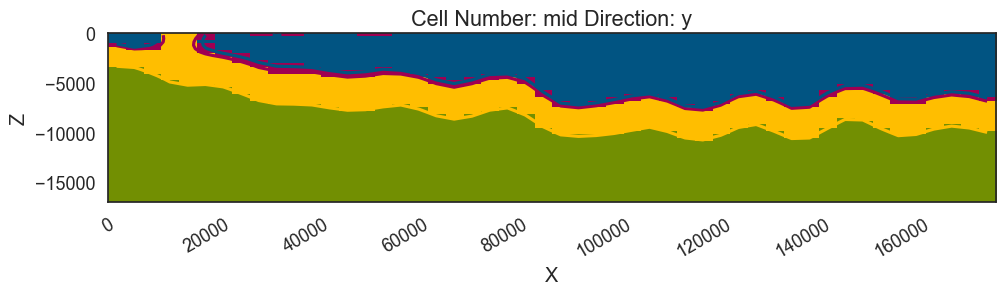

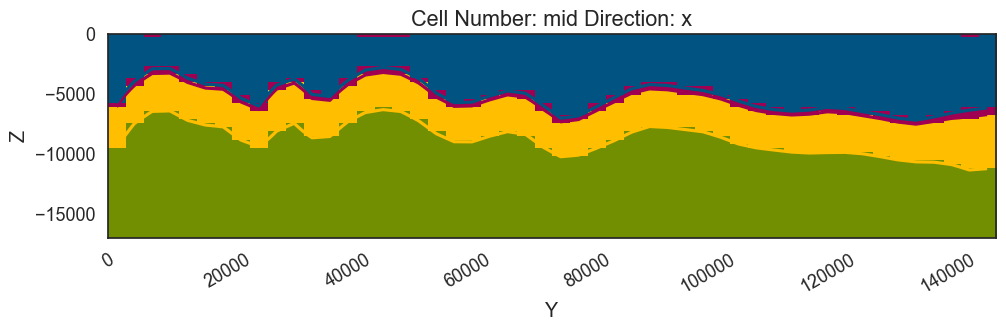

In [10]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True, ve=2, legend=True)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [12]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False, ve=1)

In [ ]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../../../output/BES/StartBR/v4/gempy_2.3.1/",
    compress=True,
)